In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
# pd.set_option('display.max_columns', None)
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [2]:
raw = pd.read_csv('/Users/dereklee/biostat-masters-thesis/mimic3c.csv')
raw.head()

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,2
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,2
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,4
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,2
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,2


In [11]:
# raw.info()
raw.isnull().sum(axis=0)

# some na's in AdmitDiagnosis, religion, marital_status

hadm_id                 0
gender                  0
age                     0
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis         25
insurance               0
religion              458
marital_status      10128
ethnicity               0
NumCallouts             0
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum             0
dtype: int64

In [12]:
# raw.AdmitDiagnosis.unique() # need to organize these diagnoses again...
# raw.AdmitProcedure.unique() # free text
# raw.ExpiredHospital.unique() # 0,1
# raw.LOSdays.unique() # continuous
# (raw.LOSdays < 0).sum() # no negatives
# raw[raw.LOSdays=="na"] # no NAs

# raw.LOSgroupNum.unique() # array([2, 4, 3, 1])
# raw.NumCPTevents.unique() # no negatives, continuous (but why are there decimals?)
# raw.NumCallouts.unique() # continuous (but why are there decimals?)
# (raw.NumChartEvents < 0).sum() # no negatives, continuous (but why are there decimals?)
# raw.NumDiagnosis.unique() # no negatives, continuous (but why are there decimals?)
# raw.NumInput.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumInput < 0).sum()
# raw.NumLabs.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumLabs < 0).sum() 
# raw.NumMicroLabs.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumMicroLabs < 0).sum()
# raw.NumNotes.unique() # no negatives, continuous (but why are there decimals?)


# raw.NumOutput.unique() # no negatives, continuous (but why are there decimals?)


# raw.NumProcEvents.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumProcEvents < 0).sum() 

# raw.NumProcs.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumProcs < 0).sum() # no negatives, continuous (but why are there decimals?)

# raw.NumRx.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumRx < 0).sum() 

# raw.NumTransfers.unique() # no negatives, continuous (but why are there decimals?)
# (raw.NumTransfers < 0).sum() 

# raw.TotalNumInteract.unique() # no negatives, continuous (but why are there decimals?)
# (raw.TotalNumInteract < 0).sum() 

# raw.admit_location.unique() # clean up text categories
# raw.admit_type.unique() # cleaned!
# raw.age.unique() # continuous
# raw.ethnicity.unique() # clean up text categories

# raw.gender.unique() # ['F', 'M']
 

# raw.insurance.unique() # cleaned unless want to collapse further
# raw.marital_status.unique() # missing values
# raw.religion.unique() # Check distributions to see if need to collapse religions


# max(raw.hadm_id.value_counts()) # only one row per patient

## Missing Values:

In [13]:
raw.AdmitDiagnosis.isna().sum() # 25 missing
raw.religion.isna().sum() # 458 missing
raw.marital_status.isna().sum() # 10128 missing

raw.religion.unique()

raw.marital_status.unique()


array(['DIVORCED', 'SINGLE', 'MARRIED', nan, 'WIDOWED',
       'UNKNOWN (DEFAULT)', 'SEPARATED', 'LIFE PARTNER'], dtype=object)

In [14]:
raw_er = raw[raw['admit_location']=="EMERGENCY ROOM ADMIT"]

raw_er_alive = raw_er[raw_er['ExpiredHospital'] == 0]
raw_er_alive.shape

(19663, 28)

In [15]:
raw_er_missing_alive = raw_er_alive[raw_er_alive.isnull().any(axis=1)]
raw_er_missing_alive.shape

(1085, 28)

In [16]:
len(raw_er_alive) - len(raw_er_missing_alive)

18578

In [19]:
len(raw_er_missing_alive)/len(raw_er_alive)


0.05517977928088288

# Normalization:

In [20]:
raw_er_alive['NumCalloutsByDay'] = raw_er_alive['NumCallouts']/raw_er_alive['LOSdays']
raw_er_alive['NumDiagnosisByDay'] = raw_er_alive['NumDiagnosis']/raw_er_alive['LOSdays']
raw_er_alive['NumProcsByDay'] = raw_er_alive['NumProcs']/raw_er_alive['LOSdays']
raw_er_alive['NumCPTeventsByDay'] = raw_er_alive['NumCPTevents']/raw_er_alive['LOSdays']
raw_er_alive['NumInputByDay'] = raw_er_alive['NumInput']/raw_er_alive['LOSdays']
raw_er_alive['NumLabsByDay'] = raw_er_alive['NumLabs']/raw_er_alive['LOSdays']
raw_er_alive['NumMicroLabsByDay'] = raw_er_alive['NumMicroLabs']/raw_er_alive['LOSdays']
raw_er_alive['NumNotesByDay'] = raw_er_alive['NumNotes']/raw_er_alive['LOSdays']
raw_er_alive['NumOutputByDay'] = raw_er_alive['NumOutput']/raw_er_alive['LOSdays']
raw_er_alive['NumRxByDay'] = raw_er_alive['NumRx']/raw_er_alive['LOSdays']
raw_er_alive['NumProcEventsByDay'] = raw_er_alive['NumProcEvents']/raw_er_alive['LOSdays']
raw_er_alive['NumTransfersByDay'] = raw_er_alive['NumTransfers']/raw_er_alive['LOSdays']
raw_er_alive['NumChartEventsByDay'] = raw_er_alive['NumChartEvents']/raw_er_alive['LOSdays']
raw_er_alive['TotalNumInteractByDay'] = raw_er_alive['TotalNumInteract']/raw_er_alive['LOSdays']


raw_er_missing_alive['NumCalloutsByDay'] = raw_er_missing_alive['NumCallouts']/raw_er_missing_alive['LOSdays']
raw_er_missing_alive['NumDiagnosisByDay'] = raw_er_missing_alive['NumDiagnosis']/raw_er_missing_alive['LOSdays']
raw_er_missing_alive['NumProcsByDay'] = raw_er_missing_alive['NumProcs']/raw_er_missing_alive['LOSdays']
raw_er_missing_alive['NumCPTeventsByDay'] = raw_er_missing_alive['NumCPTevents']/raw_er_missing_alive['LOSdays']
raw_er_missing_alive['NumInputByDay'] = raw_er_missing_alive['NumInput']/raw_er_missing_alive['LOSdays']
raw_er_missing_alive['NumLabsByDay'] = raw_er_missing_alive['NumLabs']/raw_er_missing_alive['LOSdays']
raw_er_missing_alive['NumMicroLabsByDay'] = raw_er_missing_alive['NumMicroLabs']/raw_er_missing_alive['LOSdays']
raw_er_missing_alive['NumNotesByDay'] = raw_er_missing_alive['NumNotes']/raw_er_missing_alive['LOSdays']
raw_er_missing_alive['NumOutputByDay'] = raw_er_missing_alive['NumOutput']/raw_er_missing_alive['LOSdays']
raw_er_missing_alive['NumRxByDay'] = raw_er_missing_alive['NumRx']/raw_er_missing_alive['LOSdays']
raw_er_missing_alive['NumProcEventsByDay'] = raw_er_missing_alive['NumProcEvents']/raw_er_missing_alive['LOSdays']
raw_er_missing_alive['NumTransfersByDay'] = raw_er_missing_alive['NumTransfers']/raw_er_alive['LOSdays']
raw_er_missing_alive['NumChartEventsByDay'] = raw_er_missing_alive['NumChartEvents']/raw_er_missing_alive['LOSdays']
raw_er_missing_alive['TotalNumInteractByDay'] = raw_er_missing_alive['TotalNumInteract']/raw_er_missing_alive['LOSdays']


/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [21]:
raw_er_alive.columns

Index(['hadm_id', 'gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum',
       'NumCalloutsByDay', 'NumDiagnosisByDay', 'NumProcsByDay',
       'NumCPTeventsByDay', 'NumInputByDay', 'NumLabsByDay',
       'NumMicroLabsByDay', 'NumNotesByDay', 'NumOutputByDay', 'NumRxByDay',
       'NumProcEventsByDay', 'NumTransfersByDay', 'NumChartEventsByDay',
       'TotalNumInteractByDay'],
      dtype='object')

### Drop NA's

In [22]:
raw_completecase = raw_er_alive.dropna()

# Consolidation (Missing Set):

In [23]:
# missing set consolidation:

raw_er_missing_alive.loc[raw_er_missing_alive['insurance'].isin(['Private', 'Medicaid', 'Medicare', 'Government']), 'insurance'] = "INSURED"
raw_er_missing_alive.loc[raw_er_missing_alive['insurance'].isin(['Self Pay']), 'insurance'] = "UNINSURED"

raw_er_missing_alive.loc[raw_er_missing_alive['marital_status'].isin(['LIFE PARTNER']), 'marital_status'] = "MARRIED"
raw_er_missing_alive.loc[raw_er_missing_alive['marital_status'].isin(['DIVORCED', 'SINGLE','WIDOWED','SEPARATED']), 'marital_status'] = "UNMARRIED"
raw_er_missing_alive.loc[raw_er_missing_alive['marital_status'].isin(['UNKNOWN (DEFAULT)']), 'marital_status'] = "UNKNOWN"

raw_er_missing_alive.loc[raw_er_missing_alive["religion"].isin(['PROTESTANT QUAKER', 'JEWISH', 'CATHOLIC',
       'EPISCOPALIAN', 'OTHER', "JEHOVAH'S WITNESS",
       'UNITARIAN-UNIVERSALIST', 'LUTHERAN', 'CHRISTIAN SCIENTIST',
       'GREEK ORTHODOX', 'BUDDHIST', '7TH DAY ADVENTIST', 'MUSLIM',
       'HINDU', 'ROMANIAN EAST. ORTH', 'HEBREW', 'BAPTIST', 'METHODIST']), "religion"] = "RELIGIOUS"


raw_er_missing_alive.religion = raw_er_missing_alive['religion'].replace(['NOT SPECIFIED', 'UNOBTAINABLE'], "UNKNOWN")


raw_er_missing_alive.loc[raw_er_missing_alive['ethnicity'].isin(['ASIAN',
                                                        'ASIAN - CHINESE', 
                                                         'ASIAN - ASIAN INDIAN',
                                                        'ASIAN - OTHER',
                                                        'ASIAN - FILIPINO',
                                                        'ASIAN - CAMBODIAN', 
                                                        'ASIAN - VIETNAMESE',
                                                        'ASIAN - KOREAN',
                                                         'ASIAN - THAI', 
                                                         'ASIAN - JAPANESE',
                                                        'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER']), 'ethnicity'] = "ASIAN_PACIFICISLANDER"

raw_er_missing_alive.loc[raw_er_missing_alive['ethnicity'].isin(['HISPANIC/LATINO - SALVADORAN',
                                                        'HISPANIC/LATINO - PUERTO RICAN', 
                                                         'HISPANIC/LATINO - GUATEMALAN',
                                                        'HISPANIC/LATINO - DOMINICAN',
                                                        'HISPANIC/LATINO - CUBAN',
                                                        'HISPANIC/LATINO - COLOMBIAN',
                                                        'HISPANIC/LATINO - HONDURAN', 
                                                         'HISPANIC/LATINO - MEXICAN',
                                                        'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)', 
                                                         'SOUTH AMERICAN']), 'ethnicity'] = "HISPANIC OR LATINO"

raw_er_missing_alive.loc[raw_er_missing_alive['ethnicity'].isin(['WHITE - RUSSIAN',
                                                        'WHITE - OTHER EUROPEAN',
                                                        'WHITE - BRAZILIAN',
                                                        'PORTUGUESE',
                                                        'WHITE - EASTERN EUROPEAN']), 'ethnicity'] = "WHITE"

raw_er_missing_alive.loc[raw_er_missing_alive['ethnicity'].isin(['BLACK/AFRICAN AMERICAN',
                                                         'BLACK/CAPE VERDEAN', 
                                                         'BLACK/HAITIAN',
                                                        'BLACK/AFRICAN']), 'ethnicity'] = "BLACK"


raw_er_missing_alive.loc[raw_er_missing_alive['ethnicity'].isin(['MULTI RACE ETHNICITY',
                                                        'AMERICAN INDIAN/ALASKA NATIVE',
                                                        'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
                                                        'MIDDLE EASTERN',
                                                        'CARIBBEAN ISLAND']), 'ethnicity'] = "OTHER"

raw_er_missing_alive.loc[raw_er_missing_alive['ethnicity'].isin(['UNKNOWN/NOT SPECIFIED',
                                                        'UNABLE TO OBTAIN',
                                                        'PATIENT DECLINED TO ANSWER']), 'ethnicity'] = "UNKNOWN"


raw_er_missing_alive['gender'] = raw_er_missing_alive['gender'].replace('F', 0)
raw_er_missing_alive['gender'] = raw_er_missing_alive['gender'].replace('M', 1)




/Users/dereklee/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/dereklee/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

### Summary Stats of Missing Set:

In [24]:
raw_er_missing_alive[['age', 'LOSdays','NumCalloutsByDay', 'NumDiagnosisByDay', 'NumProcsByDay',
       'NumCPTeventsByDay', 'NumInputByDay', 'NumLabsByDay',
       'NumMicroLabsByDay', 'NumNotesByDay', 'NumOutputByDay', 'NumRxByDay',
       'NumProcEventsByDay', 'NumTransfersByDay', 'NumChartEventsByDay',
       'TotalNumInteractByDay']].describe()

,age,LOSdays,NumCalloutsByDay,NumDiagnosisByDay,NumProcsByDay,NumCPTeventsByDay,NumInputByDay,NumLabsByDay,NumMicroLabsByDay,NumNotesByDay,NumOutputByDay,NumRxByDay,NumProcEventsByDay,NumTransfersByDay,NumChartEventsByDay,TotalNumInteractByDay
count,1085.000000,1085.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,55.070046,9.922203,0.045125,1.853373,0.690670,0.334569,11.804612,32.951758,0.363741,7.130839,3.343019,4.099147,0.305980,0.850645,259.819960,323.593436
std,20.989118,11.169253,0.258203,8.495302,3.759398,1.205855,42.295168,134.447139,1.401210,56.175758,8.673836,13.694880,2.387928,3.405554,778.623109,1008.492367
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000571,0.000000,0.215814
25%,39.000000,3.290000,0.000000,0.058752,0.011581,0.000000,1.343851,2.910684,0.011352,0.016651,0.476390,0.142932,0.000000,0.028193,33.134198,40.936365
50%,54.000000,6.460000,0.000000,0.193833,0.037391,0.058013,3.238773,5.914237,0.067010,0.065180,1.003333,0.812500,0.000000,0.094139,70.514991,85.072165
75%,74.000000,12.500000,0.013945,0.665088,0.135881,0.218596,7.442253,13.700893,0.181938,0.337784,2.251264,2.390581,0.000000,0.322829,148.565213,180.942132
max,88.000000,104.170000,4.717391,181.428571,68.047619,22.666667,861.666667,2925.190476,22.666667,1079.809524,90.714286,204.095238,51.023810,45.333333,14807.238095,17973.190476


In [26]:
raw_er_missing_alive.isnull().sum(axis=0)

hadm_id                    0
gender                     0
age                        0
LOSdays                    0
admit_type                 0
admit_location             0
AdmitDiagnosis             5
insurance                  0
religion                 188
marital_status           989
ethnicity                  0
NumCallouts                0
NumDiagnosis               0
NumProcs                   0
AdmitProcedure             0
NumCPTevents               0
NumInput                   0
NumLabs                    0
NumMicroLabs               0
NumNotes                   0
NumOutput                  0
NumRx                      0
NumProcEvents              0
NumTransfers               0
NumChartEvents             0
ExpiredHospital            0
TotalNumInteract           0
LOSgroupNum                0
NumCalloutsByDay           2
NumDiagnosisByDay          2
NumProcsByDay              2
NumCPTeventsByDay          2
NumInputByDay              2
NumLabsByDay               2
NumMicroLabsBy

The 2 missings in the continuous predictors all belong to the same 2 patients

In [25]:
raw_er_missing_alive[raw_er_missing_alive['NumDiagnosisByDay'].isnull()]

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumInputByDay,NumLabsByDay,NumMicroLabsByDay,NumNotesByDay,NumOutputByDay,NumRxByDay,NumProcEventsByDay,NumTransfersByDay,NumChartEventsByDay,TotalNumInteractByDay
10792,118222,0,45,0.0,EMERGENCY,EMERGENCY ROOM ADMIT,HEAD INJURY,INSURED,UNKNOWN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56422,195619,1,44,0.0,EMERGENCY,EMERGENCY ROOM ADMIT,ETOH INTOXICATION,UNINSURED,UNKNOWN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Outlier removal (Missing Set):

In [106]:
def log_transform(df,col):
    df['log_' + col] = np.log(df[col])

log_transform(raw_er_missing_alive, 'age')
log_transform(raw_er_missing_alive, 'LOSdays')
log_transform(raw_er_missing_alive, 'NumCalloutsByDay')
log_transform(raw_er_missing_alive, 'NumDiagnosisByDay')
log_transform(raw_er_missing_alive, 'NumProcsByDay')
log_transform(raw_er_missing_alive, 'NumCPTeventsByDay')
log_transform(raw_er_missing_alive, 'NumInputByDay')
log_transform(raw_er_missing_alive, 'NumLabsByDay')
log_transform(raw_er_missing_alive, 'NumMicroLabsByDay')
log_transform(raw_er_missing_alive, 'NumNotesByDay')
log_transform(raw_er_missing_alive, 'NumOutputByDay')
log_transform(raw_er_missing_alive, 'NumRxByDay')
log_transform(raw_er_missing_alive, 'NumProcEventsByDay')
log_transform(raw_er_missing_alive, 'NumTransfersByDay')
log_transform(raw_er_missing_alive, 'NumChartEventsByDay')
log_transform(raw_er_missing_alive, 'TotalNumInteractByDay')

# from pandas.api.types import is_numeric_dtype

# def remove_outlier(df):
#     low = .05
#     high = .95
#     quant_df = df.quantile([low, high])
#     for name in list(df.columns):
#         if is_numeric_dtype(df[name]):
#             print(name,": is numeric")
#             df = df[(df[name] > quant_df.loc[low, name]) 
#                     & (df[name] < quant_df.loc[high, name])]
#     return df



# remove_outlier(raw_er_missing_alive).head()



/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def filter_outlier(df):
    q_low = df.quantile(0.003)
    q_hi = df.quantile(0.997)
    
    df_filtered = df[~((df < q_low) | (df > q_hi)).any(axis=1)]
#     raw_completecase[~((raw_completecase < (q1 - 1.5 * IQR)) |(raw_completecase > (q3 + 1.5 * IQR))).any(axis=1)]
    return df_filtered


nooutlier_missing = filter_outlier(raw_er_missing_alive)


In [256]:
len(nooutlier_missing)

1022

In [254]:
nooutlier_missing.isnull().sum()

hadm_id                        0
gender                         0
age                            0
LOSdays                        0
admit_type                     0
admit_location                 0
AdmitDiagnosis                 1
insurance                      0
religion                     183
marital_status               932
ethnicity                      0
NumCallouts                    0
NumDiagnosis                   0
NumProcs                       0
AdmitProcedure                 0
NumCPTevents                   0
NumInput                       0
NumLabs                        0
NumMicroLabs                   0
NumNotes                       0
NumOutput                      0
NumRx                          0
NumProcEvents                  0
NumTransfers                   0
NumChartEvents                 0
ExpiredHospital                0
TotalNumInteract               0
LOSgroupNum                    0
NumCalloutsByDay               0
NumDiagnosisByDay              0
NumProcsBy

# Data Exploration (Missing Set):

In [257]:
nooutlier_missing.describe()

,hadm_id,gender,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum,NumCalloutsByDay,NumDiagnosisByDay,NumProcsByDay,NumCPTeventsByDay,NumInputByDay,NumLabsByDay,NumMicroLabsByDay,NumNotesByDay,NumOutputByDay,NumRxByDay,NumProcEventsByDay,NumTransfersByDay,NumChartEventsByDay,TotalNumInteractByDay,log_age,log_LOSdays,log_NumCalloutsByDay,log_NumDiagnosisByDay,log_NumProcsByDay,log_NumCPTeventsByDay,log_NumInputByDay,log_NumLabsByDay,log_NumMicroLabsByDay,log_NumNotesByDay,log_NumOutputByDay,log_NumRxByDay,log_NumProcEventsByDay,log_NumTransfersByDay,log_NumChartEventsByDay,log_TotalNumInteractByDay
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.0,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.00000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,149354.078278,0.627202,55.575342,9.599080,0.088650,1.855313,0.584276,0.812123,33.028728,48.728483,1.043669,1.892378,8.570470,7.442016,0.305949,0.852573,587.495998,0.0,692.700626,2.364971,0.034787,1.059990,0.306663,0.232529,8.127596,20.014553,0.254198,2.224912,2.531075,2.652917,0.135415,0.510888,181.060446,219.145967,3.929486,1.846137,-inf,-1.612219,-inf,-inf,-inf,-inf,-inf,-2.479583,-inf,-inf,-inf,-2.377210,-inf,4.470502
std,28844.193787,0.483786,20.928723,9.366163,0.167846,2.008868,0.757424,0.812692,34.914997,28.326077,1.324976,5.539871,5.911759,5.980348,0.883000,0.879232,383.202993,0.0,431.203866,1.161269,0.156322,3.148238,1.202934,0.639912,20.789748,53.950825,0.757667,11.058828,5.588925,6.643177,0.988487,1.527115,389.608413,480.348907,0.447957,0.963968,NaN,1.746586,NaN,NaN,NaN,NaN,NaN,2.293547,NaN,NaN,NaN,1.787043,NaN,1.242439
min,100510.000000,0.000000,17.000000,0.380000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.050000,0.000000,0.0,8.500000,1.000000,0.000000,0.001290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000143,0.000000,0.000000,0.000000,0.001004,0.000000,1.872247,2.833213,-0.967584,-inf,-6.652863,-inf,-inf,-inf,-inf,-inf,-8.849514,-inf,-inf,-inf,-6.903604,-inf,0.627139
25%,123497.250000,0.000000,39.250000,3.580000,0.000000,0.712500,0.170000,0.000000,9.130000,32.432500,0.150000,0.210000,3.932500,3.370000,0.000000,0.340000,284.602500,0.0,351.600000,1.000000,0.000000,0.059703,0.011721,0.000000,1.316651,2.921162,0.013600,0.017314,0.478434,0.160027,0.000000,0.029023,33.325518,40.918623,3.669891,1.275363,-inf,-2.818385,-4.446360,-inf,0.275086,1.071977,-4.297928,-4.056244,-0.737237,-1.832427,-inf,-3.539677,3.506323,3.711585
50%,149723.500000,1.000000,55.000000,6.630000,0.000000,1.210000,0.370000,0.615000,19.945000,43.470000,0.600000,0.430000,7.105000,6.935000,0.000000,0.585000,490.405000,0.0,581.000000,2.000000,0.000000,0.186949,0.036867,0.057890,3.132771,5.817664,0.067037,0.063710,0.984344,0.792364,0.000000,0.092820,68.861794,81.697867,4.007333,1.891605,-inf,-1.676920,-3.300446,-2.849218,1.141917,1.760898,-2.702508,-2.753413,-0.015787,-0.232752,-inf,-2.377097,4.232072,4.403028
75%,173034.500000,1.000000,75.000000,12.070000,0.130000,2.197500,0.697500,1.345000,44.160000,56.225000,1.380000,1.110000,12.280000,10.817500,0.000000,1.040000,836.560000,0.0,980.845000,4.000000,0.015919,0.595662,0.126090,0.208041,6.787037,13.054182,0.177337,0.306759,2.122774,2.171924,0.000000,0.290572,139.520845,167.977947,4.317488,2.490722,-4.14092,-0.518083,-2.070771,-1.570021,1.915009,2.569108,-1.729711,-1.181697,0.752724,0.775613,-inf,-1.235908,4.9382

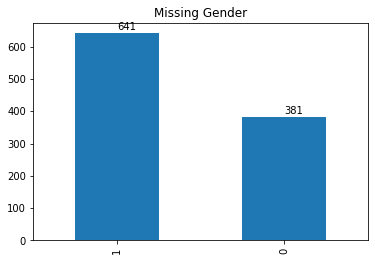

In [107]:
from scipy import stats
import matplotlib.pylab as plt

%matplotlib inline


(nooutlier_missing.gender).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_missing.gender.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Missing Gender")
    

Text(0.5, 1.0, 'Histogram of Missing Patient Age when Admitted')

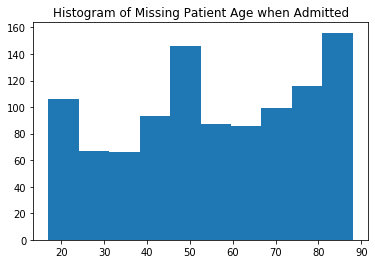

In [108]:
plt.hist(nooutlier_missing.age)
plt.title("Histogram of Missing Patient Age when Admitted")

Text(0.5, 1.0, 'LOS in Days')

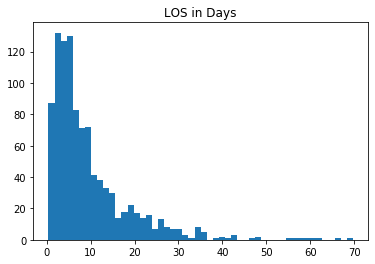

In [109]:
plt.hist(nooutlier_missing.LOSdays, bins = 50)
plt.title("LOS in Days")

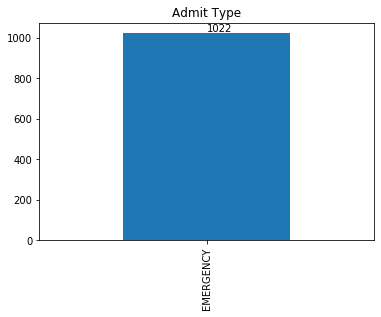

In [110]:
(nooutlier_missing.admit_type).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_missing.admit_type.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Admit Type")

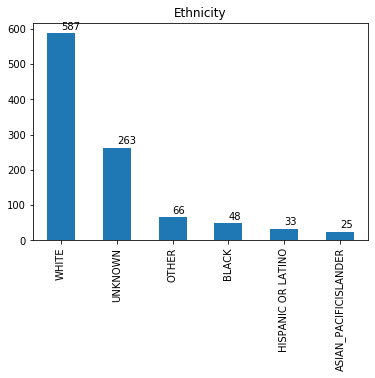

In [111]:
(nooutlier_missing.ethnicity).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_missing.ethnicity.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Ethnicity")

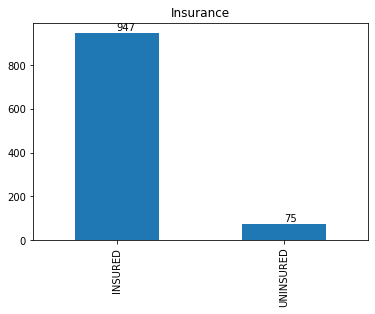

In [112]:
(nooutlier_missing.insurance).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_missing.insurance.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Insurance")

In [113]:
nooutlier_missing.marital_status.value_counts()

MARRIED      45
UNMARRIED    44
UNKNOWN       1
Name: marital_status, dtype: int64

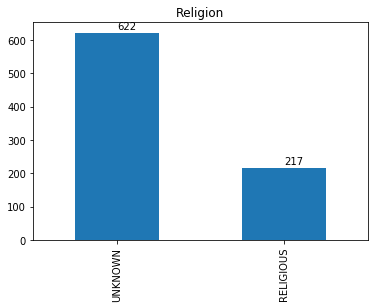

In [114]:
(nooutlier_missing.religion).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_missing.religion.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Religion")

# Non-missing data exploration:

In [115]:
log_transform(raw_completecase, 'age')
log_transform(raw_completecase, 'LOSdays')
log_transform(raw_completecase, 'NumCalloutsByDay')
log_transform(raw_completecase, 'NumDiagnosisByDay')
log_transform(raw_completecase, 'NumProcsByDay')
log_transform(raw_completecase, 'NumCPTeventsByDay')
log_transform(raw_completecase, 'NumInputByDay')
log_transform(raw_completecase, 'NumLabsByDay')
log_transform(raw_completecase, 'NumMicroLabsByDay')
log_transform(raw_completecase, 'NumNotesByDay')
log_transform(raw_completecase, 'NumOutputByDay')
log_transform(raw_completecase, 'NumRxByDay')
log_transform(raw_completecase, 'NumProcEventsByDay')
log_transform(raw_completecase, 'NumTransfersByDay')
log_transform(raw_completecase, 'NumChartEventsByDay')
log_transform(raw_completecase, 'TotalNumInteractByDay')

# from pandas.api.types import is_numeric_dtype

# def remove_outlier(df):
#     low = .05
#     high = .95
#     quant_df = df.quantile([low, high])
#     for name in list(df.columns):
#         if is_numeric_dtype(df[name]):
#             print(name,": is numeric")
#             df = df[(df[name] > quant_df.loc[low, name]) 
#                     & (df[name] < quant_df.loc[high, name])]
#     return df



# remove_outlier(raw_completecase).head()




/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
raw_completecase.columns

Index(['hadm_id', 'gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum',
       'NumCalloutsByDay', 'NumDiagnosisByDay', 'NumProcsByDay',
       'NumCPTeventsByDay', 'NumInputByDay', 'NumLabsByDay',
       'NumMicroLabsByDay', 'NumNotesByDay', 'NumOutputByDay', 'NumRxByDay',
       'NumProcEventsByDay', 'NumTransfersByDay', 'NumChartEventsByDay',
       'TotalNumInteractByDay', 'log_age', 'log_LOSdays',
       'log_NumCalloutsByDay', 'log_NumDiagnosisByDay', 'log_NumProcsByDay',
       'log_NumCPTeventsByDay', 'log_NumInputByDay', 'log_NumLabsByDay',
       'log_NumMicroLabsByDay', 'log_NumNotesByDay', 'log_NumOutputByDay',

## Consolidation:

In [117]:
# included patients consolidation:

raw_completecase.loc[raw_completecase['insurance'].isin(['Private', 'Medicaid', 'Medicare', 'Government']), 'insurance'] = "INSURED"
raw_completecase.loc[raw_completecase['insurance'].isin(['Self Pay']), 'insurance'] = "UNINSURED"

raw_completecase.loc[raw_completecase['marital_status'].isin(['LIFE PARTNER']), 'marital_status'] = "MARRIED"
raw_completecase.loc[raw_completecase['marital_status'].isin(['DIVORCED', 'SINGLE','WIDOWED','SEPARATED']), 'marital_status'] = "UNMARRIED"
raw_completecase.loc[raw_completecase['marital_status'].isin(['UNKNOWN (DEFAULT)']), 'marital_status'] = "UNKNOWN"

raw_completecase.loc[raw_completecase["religion"].isin(['PROTESTANT QUAKER', 'JEWISH', 'CATHOLIC',
       'EPISCOPALIAN', 'OTHER', "JEHOVAH'S WITNESS",
       'UNITARIAN-UNIVERSALIST', 'LUTHERAN', 'CHRISTIAN SCIENTIST',
       'GREEK ORTHODOX', 'BUDDHIST', '7TH DAY ADVENTIST', 'MUSLIM',
       'HINDU', 'ROMANIAN EAST. ORTH', 'HEBREW', 'BAPTIST', 'METHODIST']), "religion"] = "RELIGIOUS"


raw_completecase.religion = raw_completecase['religion'].replace(['NOT SPECIFIED', 'UNOBTAINABLE'], "UNKNOWN")


raw_completecase.loc[raw_completecase['ethnicity'].isin(['ASIAN',
                                                        'ASIAN - CHINESE', 
                                                         'ASIAN - ASIAN INDIAN',
                                                        'ASIAN - OTHER',
                                                        'ASIAN - FILIPINO',
                                                        'ASIAN - CAMBODIAN', 
                                                        'ASIAN - VIETNAMESE',
                                                        'ASIAN - KOREAN',
                                                         'ASIAN - THAI', 
                                                         'ASIAN - JAPANESE',
                                                        'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER']), 'ethnicity'] = "ASIAN_PACIFICISLANDER"

raw_completecase.loc[raw_completecase['ethnicity'].isin(['HISPANIC/LATINO - SALVADORAN',
                                                        'HISPANIC/LATINO - PUERTO RICAN', 
                                                         'HISPANIC/LATINO - GUATEMALAN',
                                                        'HISPANIC/LATINO - DOMINICAN',
                                                        'HISPANIC/LATINO - CUBAN',
                                                        'HISPANIC/LATINO - COLOMBIAN',
                                                        'HISPANIC/LATINO - HONDURAN', 
                                                         'HISPANIC/LATINO - MEXICAN',
                                                        'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)', 
                                                         'SOUTH AMERICAN']), 'ethnicity'] = "HISPANIC OR LATINO"

raw_completecase.loc[raw_completecase['ethnicity'].isin(['WHITE - RUSSIAN',
                                                        'WHITE - OTHER EUROPEAN',
                                                        'WHITE - BRAZILIAN',
                                                        'PORTUGUESE',
                                                        'WHITE - EASTERN EUROPEAN']), 'ethnicity'] = "WHITE"

raw_completecase.loc[raw_completecase['ethnicity'].isin(['BLACK/AFRICAN AMERICAN',
                                                         'BLACK/CAPE VERDEAN', 
                                                         'BLACK/HAITIAN',
                                                        'BLACK/AFRICAN']), 'ethnicity'] = "BLACK"


raw_completecase.loc[raw_completecase['ethnicity'].isin(['MULTI RACE ETHNICITY',
                                                        'AMERICAN INDIAN/ALASKA NATIVE',
                                                        'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
                                                        'MIDDLE EASTERN',
                                                        'CARIBBEAN ISLAND']), 'ethnicity'] = "OTHER"

raw_completecase.loc[raw_completecase['ethnicity'].isin(['UNKNOWN/NOT SPECIFIED',
                                                        'UNABLE TO OBTAIN',
                                                        'PATIENT DECLINED TO ANSWER']), 'ethnicity'] = "UNKNOWN"


raw_completecase['gender'] = raw_completecase['gender'].replace('F', 0)
raw_completecase['gender'] = raw_completecase['gender'].replace('M', 1)




/Users/dereklee/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/dereklee/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

## Outlier Removal:

In [118]:
nooutlier_completecase = filter_outlier(raw_completecase)


In [120]:
len(nooutlier_completecase)

17790

## Graphs:

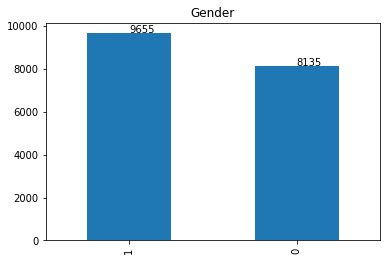

In [121]:
(nooutlier_completecase.gender).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_completecase.gender.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Gender")

We have 6000 more males than females

Text(0.5, 1.0, 'Histogram of Patient Age when Admitted')

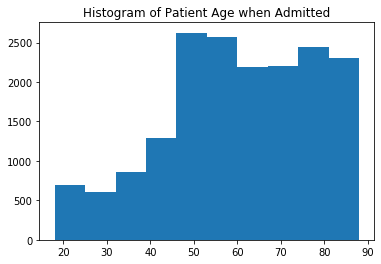

In [122]:
plt.hist(nooutlier_completecase.age)
plt.title("Histogram of Patient Age when Admitted")

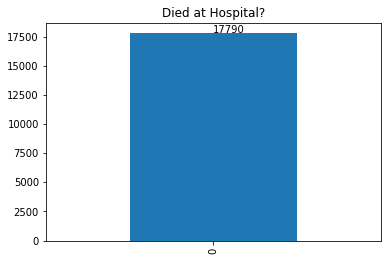

In [123]:
(nooutlier_completecase.ExpiredHospital).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_completecase.ExpiredHospital.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Died at Hospital?")

We should probably get rid of those who died since we want Length of Stay, which will be quite different for those who are going to die?

Text(0.5, 1.0, 'LOS in Days')

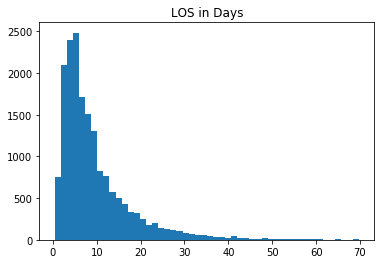

In [124]:
plt.hist(nooutlier_completecase.LOSdays, bins = 50)
plt.title("LOS in Days")

Text(0.5, 1.0, 'Total Number of CPT Events by Day')

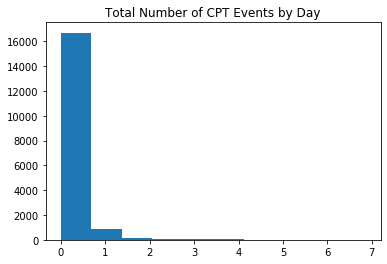

In [125]:
plt.hist(nooutlier_completecase.NumCPTeventsByDay)
plt.title("Total Number of CPT Events by Day")

Text(0.5, 1.0, 'Total Number of Chart Events')

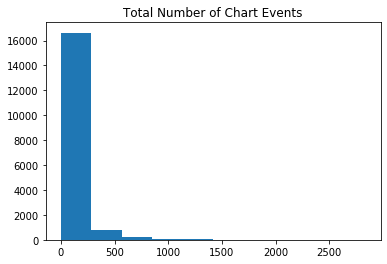

In [126]:
plt.hist(nooutlier_completecase.NumChartEventsByDay)
plt.title("Total Number of Chart Events")

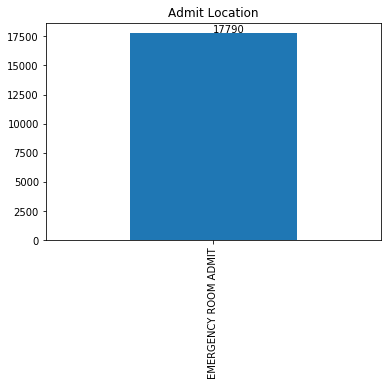

In [127]:
(nooutlier_completecase.admit_location).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_completecase.admit_location.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Admit Location")

Maybe we need to perform ANOVA to find out which categories can be collapsed.

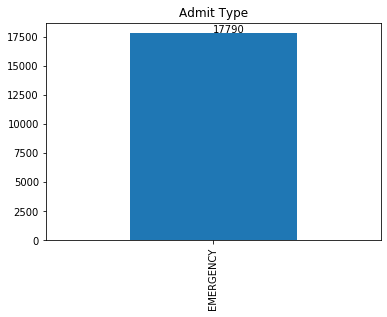

In [128]:
(nooutlier_completecase.admit_type).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_completecase.admit_type.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Admit Type")

Imbalance heavily favoring emergency.

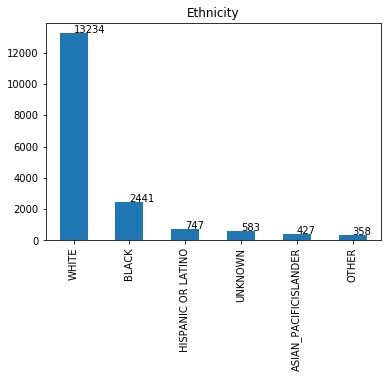

In [255]:
(nooutlier_completecase.ethnicity).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_completecase.ethnicity.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Ethnicity")

Definitely consolidate.

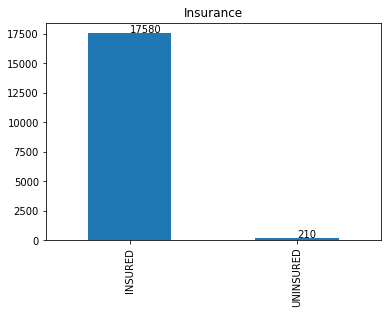

In [130]:
(nooutlier_completecase.insurance).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_completecase.insurance.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Insurance")

Insurance is worth consolidating.

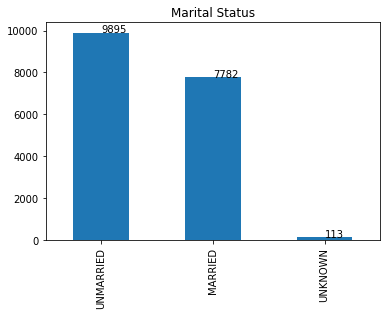

In [131]:
(nooutlier_completecase.marital_status).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_completecase.marital_status.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Marital Status")

Also worth consolidating.

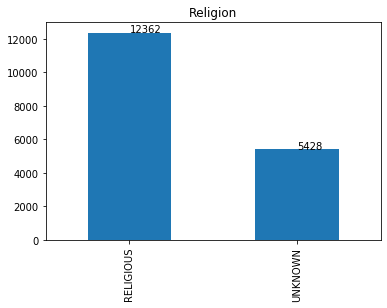

In [132]:
(nooutlier_completecase.religion).value_counts().plot(kind='bar')
for index, value in enumerate(nooutlier_completecase.religion.value_counts()):
    plt.text(index, value+10, str(value))
    plt.title("Religion")

## Correlations:

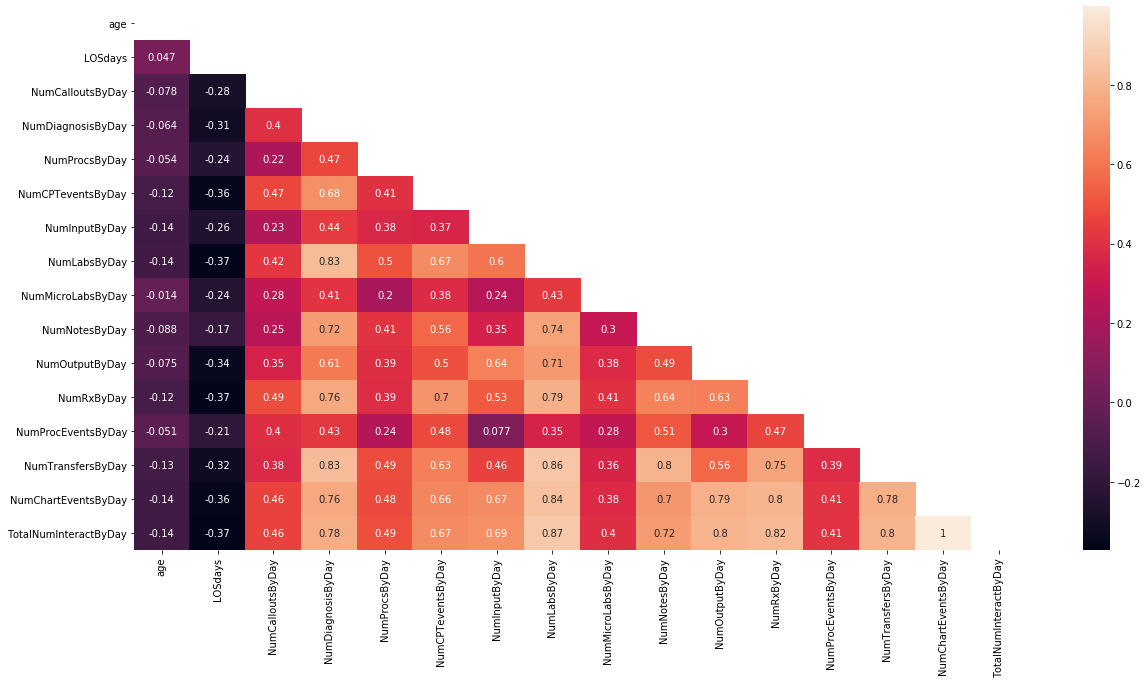

In [134]:
import numpy as np
import seaborn as sns
continuous = nooutlier_completecase[['age', 'LOSdays', 'NumCalloutsByDay', 'NumDiagnosisByDay', 'NumProcsByDay',
                              'NumCPTeventsByDay', 'NumInputByDay', 'NumLabsByDay', 'NumMicroLabsByDay',
       'NumNotesByDay', 'NumOutputByDay', 'NumRxByDay', 'NumProcEventsByDay', 'NumTransfersByDay',
       'NumChartEventsByDay','TotalNumInteractByDay']]
a4_dims = (20, 10)
corrMatrix=continuous.corr()
mask_ut=np.triu(np.ones(corrMatrix.shape)).astype(np.bool)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corrMatrix,mask=mask_ut,annot=True)
plt.show()

https://datascience.stackexchange.com/questions/12554/does-xgboost-handle-multicollinearity-by-itself

If we don't use XGBoost, need to consider the following:

+ `NumProcsEventsByDay` and `NumDiagnosisByDay` = 0.8  
+ `NumNotesByDay` and `NumDiagnosisByDay` = 0.74  
+ `NumTransfersByDay` and `NumDiagnosisByDay` = 0.82  
+ `NumLabsByDay` and `NumProcsEventsByDay` = 0.72   
+ `NumTransfersByDay` and `NumProcsByDay` = 0.71    
+ `NumMicroLabsByDay` and `NumInputByDay` = 0.79   
+ `TotalNumInteractByDay` and `NumInputByDay` = 0.94    
+ `NumChartEventsByDay` and `NumInputByDay` = 0.94   
+ `NumMicroLabsByDay` and `NumLabsByDay` = 0.71  
+ `NumNotesByDay` and `NumLabsByDay` = 0.72  
+ `TotalNumInteractByDay` and `NumLabsByDay` = 0.7    
+ `TotalNumInteractByDay` and `NumNotesByDay` = 0.78  
+ `NumChartEventsByDay` and `NumOutputByDay` = 0.77  
+ `TotalNumInteractByDay` and `NumOutputByDay` = 0.73  
+ `NumChartEventsByDay` and `TotalNumInteractByDay` = 0.98  

To drop: `NumOutputByDay` and `TotalNumInteractByDay` and `NumTransfersByDay` and `NumMicroLabsByDay` and `NumDiagnosisByDay` and `NumProcsEventsByDay` and `NumInputByDay`


## Final Dataset:

In [135]:
nooutlier_completecase.columns

Index(['hadm_id', 'gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum',
       'NumCalloutsByDay', 'NumDiagnosisByDay', 'NumProcsByDay',
       'NumCPTeventsByDay', 'NumInputByDay', 'NumLabsByDay',
       'NumMicroLabsByDay', 'NumNotesByDay', 'NumOutputByDay', 'NumRxByDay',
       'NumProcEventsByDay', 'NumTransfersByDay', 'NumChartEventsByDay',
       'TotalNumInteractByDay', 'log_age', 'log_LOSdays',
       'log_NumCalloutsByDay', 'log_NumDiagnosisByDay', 'log_NumProcsByDay',
       'log_NumCPTeventsByDay', 'log_NumInputByDay', 'log_NumLabsByDay',
       'log_NumMicroLabsByDay', 'log_NumNotesByDay', 'log_NumOutputByDay',

In [215]:
# Not using AdmitDiagnosis nor AdmitProcedure nor LOSgroupNum nor admit_type (all are EMERGENCY) nor ExpiredHospital (all are 0)
# nor Transfers nor Callouts
to_dummify_simple = ['insurance', 'religion', 'marital_status','ethnicity']

# simple_data = raw_completecase[['gender', 'age', 'LOSdays', 'admit_location', 'admit_type',
#         'insurance', 'religion', 'marital_status',
#        'ethnicity', 'NumCalloutsByDay','NumCPTeventsByDay', 'NumLabsByDay', 
#                                 'NumNotesByDay', 'NumRxByDay', 'NumChartEventsByDay', 'ExpiredHospital']]

# not using NumCallouts b/c usually only 1 callout, also don't use NumProcEvents b/c already have NumProcs

simple_data = nooutlier_completecase[['gender', 'age', 'LOSdays',
        'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumDiagnosisByDay', 'NumProcsByDay',
                              'NumCPTeventsByDay', 'NumInputByDay', 'NumLabsByDay', 'NumMicroLabsByDay',
       'NumNotesByDay', 'NumOutputByDay', 'NumRxByDay',
       'NumChartEventsByDay','TotalNumInteractByDay']]



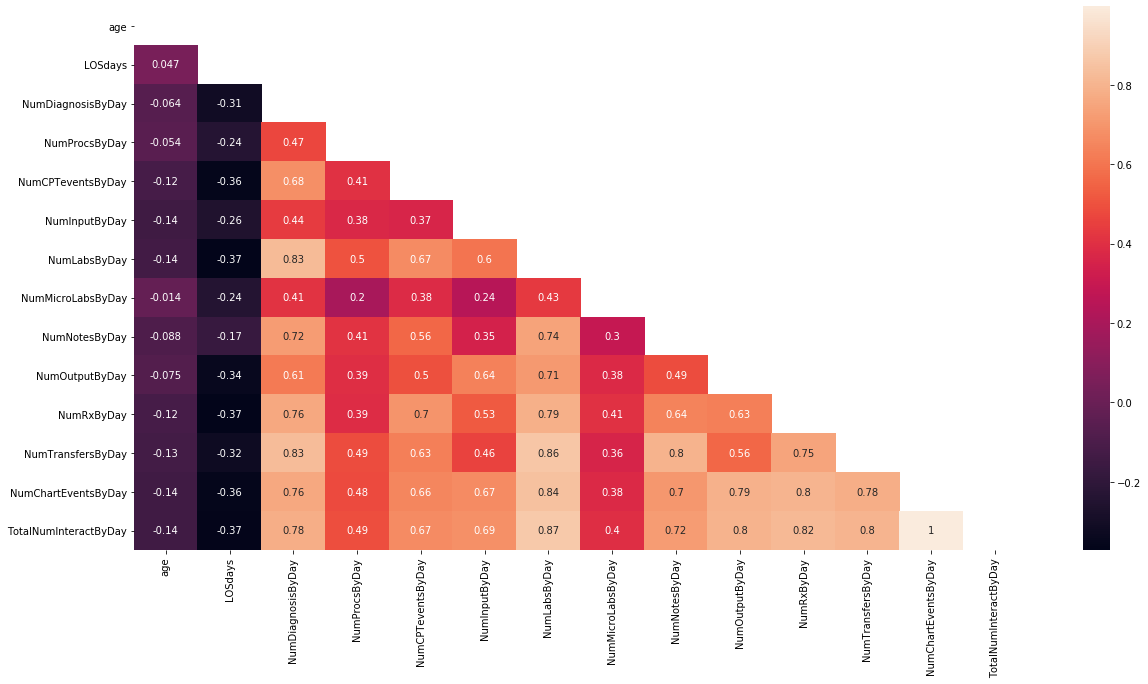

In [156]:
simplecontinuous = simple_data[['age', 'LOSdays','NumDiagnosisByDay', 'NumProcsByDay',
                              'NumCPTeventsByDay', 'NumInputByDay', 'NumLabsByDay', 'NumMicroLabsByDay',
       'NumNotesByDay', 'NumOutputByDay', 'NumRxByDay', 'NumTransfersByDay',
       'NumChartEventsByDay','TotalNumInteractByDay']]
a4_dims = (20, 10)
corrMatrix=simplecontinuous.corr()
mask_ut=np.triu(np.ones(corrMatrix.shape)).astype(np.bool)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corrMatrix,mask=mask_ut,annot=True)
plt.show()

Need to further remove `NumNotesByDay` and `NumCPTeventsByDay`

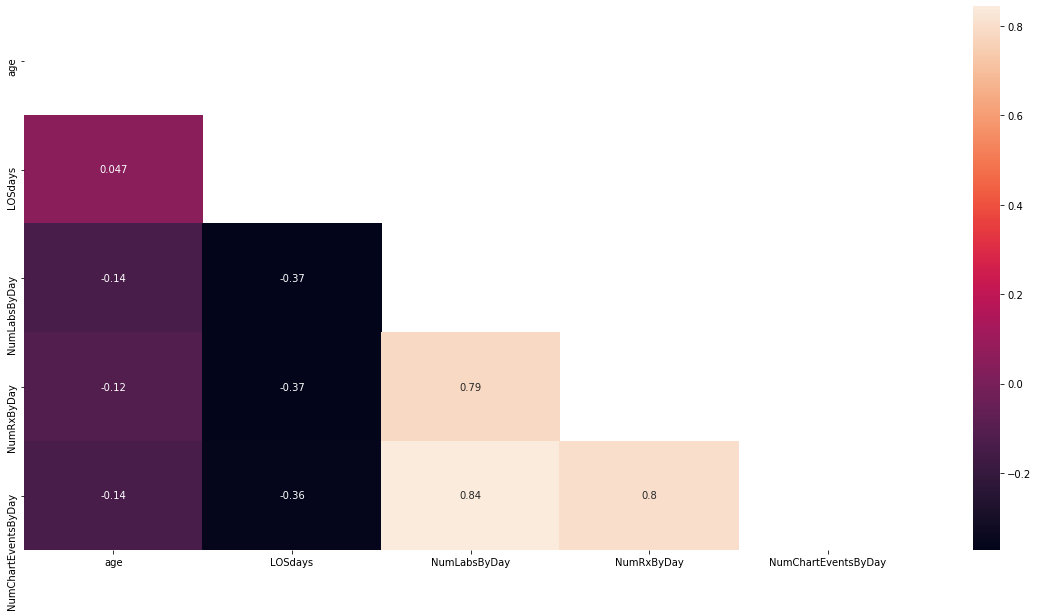

In [157]:
simplecontinuous_corrected = simple_data[['age', 'LOSdays',
                                'NumLabsByDay','NumRxByDay', 'NumChartEventsByDay']]
a4_dims = (20, 10)
corrMatrix=simplecontinuous_corrected.corr()
mask_ut=np.triu(np.ones(corrMatrix.shape)).astype(np.bool)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corrMatrix,mask=mask_ut,annot=True)
plt.show()

In [158]:
simple_data_corrected = simple_data[['gender', 'age', 'LOSdays', 'admit_location', 'admit_type',
        'insurance', 'religion', 'marital_status',
       'ethnicity','NumLabsByDay', 
                                'NumRxByDay', 'NumChartEventsByDay', 'ExpiredHospital']]

In [159]:
len(simple_data)

17790

In [160]:
# a = sorted(nooutlier_simple_data.AdmitDiagnosis.unique())
# a_df = pd.DataFrame(a)
# a_df.to_csv("/Users/dereklee/biostat-masters-thesis/admit_diagnoses.csv")

Example of how diffficult to look at text data: ABSCESS;RULE OUT TUBERCULOSIS

In [162]:
len(nooutlier_completecase.AdmitDiagnosis.unique())

4898

In [ ]:
# simple_data.loc[nooutlier_simple_data['AdmitDiagnosis'].isin(['02-239','14-AAA']), 'AdmitDiagnosis'] = "UNKNOWN"


# nooutlier_simple_data.loc[nooutlier_simple_data['AdmitDiagnosis'].isin([' CHEST PAIN',
# '2ND DEGREE HEART BLOCK',
# '3RD DEGREE HEART BLOCK',
# '? AORTIC FILLING DEFECT',
# '?? CVA',
# 'A- FLUTTER',
# 'AAA REPAIR',
# 'AAA;TELEMETRY',
# 'ABDOMINAL AORTIC ANEURYSM',
# 'ABDOMINAL AORTIC ANEURYSM LEAK',
# 'ABDOMINAL AORTIC ANEURYSM THROMBOSIS',
# 'ABDOMINAL AORTIC ANEURYSM;',
# 'ABDOMINAL AORTIC ANEURYSM;? ULCERATIVE COLITIS',
# 'ABDOMINAL AORTIC ANEURYSM;TELEMETRY',
# 'ABNORMAL AORTIC ANEURYSM',
# 'ACUTE COROMARY SYNDROME;PEUMONIA',
# 'ACUTE CORONARUY SYNDROME',
# 'ACUTE CORONARY DISEASE',
# 'ACUTE CORONARY SYNDROME',
# 'ACUTE CORONARY SYNDROME;CHEST PAIN',
# 'ACUTE CORONARY SYNDROME;CONGESTIVE HEART FAILURE',
# 'ACUTE CORONARY SYNDROME;ST ELEVATION MI',
# 'ACUTE CORONARY SYNDROME;TELEMETRY',
# 'ACUTE CVA;TELEMETRY',
# 'ACUTE MI,SEPSIS',
# 'ACUTE MYOCARDIAL INFARCTION',
# 'ACUTE MYOCARDIAL INFARCTION;PNEUMONIA;CONGESTIVE HEART FAILURE',
# 'ACUTE MYOCARDIAL INFARCTION;TELEMETRY',
# 'ACUTE MYOCARDIAL INFRACTION',
# 'ACUTE PULMONARY EMBOLISM',
# 'ACUTE STROKE',
# 'ACUTE STROKE;TELEMETRY','ACUTE VASCULAR OCCLUSION','AF/HYPOTENSION',
# 'AFIB',
# 'AFIB WITH RAPID VENTRICULAR RESPONSE',
# 'AFIB WITH RVR',
# AFIB-CONGESTIVE HEART FAILURE,
# AFIB/AFLUTTER,
# AFIB/PNA,
# AFLUTTER,
# AGITATION AND GIB,
# AICD FIRING,
# ANEMIA,
# ANEMIA BLEED;TELEMETRY,
# ANEMIA, PNEUMONIA,
# ANEMIA,SHORTNESS OF BREATH,RENAL INSUFFICIENCY,
# ANEMIA,THROMBOCYTOPENIA,ACUTE RENAL FAILURE,
# ANEMIA-RENAL FAILURE,
# ANEMIA-THROMBOCYTOPENIA-COAGULOPATHY,
# ANEMIA; UNABLE TO AMBULATE,
# ANEMIA;ATRIAL FIBRILLATION;ETOH WITHDRAWAL,
# ANEMIA;CONGESTIVE HEART FAILURE,
# ANEMIA;FEVER,
# ANEMIA;GASTROINTESTINAL BLEED,
# ANEMIA;GI BLEED;RESP ARREST,
# ANEMIA;METHICILLIN RESISTANT STAPH AUREUS,
# ANEMIA;RULE OUT MYOCARDIAL INFARCTION,
# ANEMIA;SVT,
# ANEMIA;TELEMETRY,
# ANEURYSM,
# ANEURYSM;TELEMETRY,
# ANGINA,
# ANGIOEDEMA,
# AORTIC ANEURYSM,
# AORTIC DESSCTION,
# AORTIC DILATATION,
# AORTIC DISECTION,
# AORTIC DISSECT,
# AORTIC DISSECTION,
# AORTIC DISSECTION;TELEMETRY,
# AORTIC HEMATOMA,
# AORTIC INJURY,
# AORTIC STENOSIS,
# AORTIC ULCERATION,
# AORTIC VALVE ABSCESS,
# AORTIC VALVE MALFUNCTIONING,
# 'A,FLUTTER W,RVR,? NEW BRAIN MASS',
# ARRHYTHMIA
# ARRYTHMIA
# ARTERIAL INSUFFICIENCY
# ARTERIAL OCCLUSION
# ARTERIAL THROMBOSIS;TELEMETRY
# ARTERIOVEOUS MALFORMATION,
# ATERIAL INSUFFICIENCY,
# ATRIAL FIBRILLATION,
# ATRIAL FIBRILLATION W/ RVR,
# ATRIAL FIBRILLATION,PNEUMONIA,
# ATRIAL FIBRILLATION; RVR,
# ATRIAL FIBRILLATION;(+) TRAPONIN,
# ATRIAL FIBRILLATION;CHRONIC OBST PULM DISEASE,
# ATRIAL FIBRILLATION;DYSPNEA,
# ATRIAL FIBRILLATION;PERICARDIAL EFFUSION,
# ATRIAL FIBRILLATION;TELEMETRY,
# ATRIAL FIBRILLATION;TELEMETRY;HYPOTENSION,
# ATRIAL FIBRILLATION;TELEMETRY;RVR;TELEMETRY,
# ATRIAL FIBRILLATION;TELEMETRY;TELEMETRY,
# ATRIAL FIBRILLATION;TELEMETRY;URINARY TRACT INFECTION,
# ATRIAL FLUTTER;TELEMTRY,
# 'ATYPICAL CHEST PAIN',BISCUPID VALVE;DILATED AORTIC ROOT,
# 'BIVENTRICULAR HEART FAILURE','BLEEDING AV FISTULA','BLEEDING FISTUA',BRADYCARDIA,
# BRADYCARDIA SHOCK,
# BRADYCARDIA-ACUTE RENAL FAILURE,
# BRADYCARDIA-NAUSEA-VOMITINH,
# BRADYCARDIA-RENAL FAILURE-HYPERKALEMIA,
# BRADYCARDIA-SYNCOPE,
# BRADYCARDIA;ACUTE RENAL FAILURE,
# BRADYCARDIA;CARDIAC ARREST,
# BRADYCARDIA;HYPOTENSION;SEPSIS,
# BRADYCARDIA;RENAL FAILURE;HYPERKALEMIA,
# 'BRADYCARDIA;SYNCOPE','BRUGADA SYNDROME;SYNCOPE;TELEMETRY;DEHYDRATION',CARDIAC  ARREST,
# CARDIAC ARREST,
# CARDIAC ARREST;GASTROINTESTINAL BLEED,
# CARDIAC ARREST;TELEMETRY,
# CARDIAC ARREST;URINARY TRACT INFECTION,
# CARDIAC CATH,
# CARDIAC CATH S/P CARDIAC ARREST,
# CARDIAC TAMPIONADE,
# CARDIAC TAMPONADE,
# CARDIOGENIC SHOCK,
# CARDIOMELOPATHY;CONGESTIVE HEART FAILURE,
# CARDIOMYOPATHY,
# CAROTID INJURIES,
# 'CATHETER INFECTION','CHF EXACERBATION',
# 'CHF, PNEUMONIA',
# 'CHF, R/O MI, ARF',
# 'CHF,ACUTE CORONARY SYNDROME',
# 'CHF,ARF',
# 'CHF,PNEUMONIA',
# 'CHF,R/O MI',
# 'CHF/HYPONATREMIA','CHR;AFIB WITH RVR',CONGESTIVE HEART DISEASE,
# 'CONGESTIVE HEART FAILUE, PNEUMONIA',
# CONGESTIVE HEART FAILURE,
# CONGESTIVE HEART FAILURE EXACERBATION,
# CONGESTIVE HEART FAILURE EXACERBATION-R/O MI,
# 'CONGESTIVE HEART FAILURE,ACUTE RENAL FAILOURE',
# 'CONGESTIVE HEART FAILURE,COPD FLARE',
# 'CONGESTIVE HEART FAILURE,ENDOCARDITIS',
# 'CONGESTIVE HEART FAILURE,REPIRATORY FAILURE',
# 'CONGESTIVE HEART FAILURE,SEPSIS',
# 'CONGESTIVE HEART FAILURE,SHORTNESS OF BREATH',
# CONGESTIVE HEART FAILURE-PNEUMONIA,
# CONGESTIVE HEART FAILURE-R/O MYOCARDIAL INFARCTION,
# CONGESTIVE HEART FAILURE-SUBDURAL HEMATOMA,
# CONGESTIVE HEART FAILURE/PNEUMONIA,
# CONGESTIVE HEART FAILURE/V TACH,
# CONGESTIVE HEART FAILURE; HYPERCARBIC RESP FAILURE,
# CONGESTIVE HEART FAILURE; SHORTNESS OF BREATH,
# CONGESTIVE HEART FAILURE;A FIB VS ATRIAL TACHUCARDIA,
# CONGESTIVE HEART FAILURE;A-FIB,
# CONGESTIVE HEART FAILURE;ABDOMINAL PAIN,
# CONGESTIVE HEART FAILURE;ACUTE RENAL FAILURE,
# CONGESTIVE HEART FAILURE;APPENDICITIS,
# CONGESTIVE HEART FAILURE;CHEST PAIN,
# CONGESTIVE HEART FAILURE;CHRONIC OBST PULM DISEASE,
# CONGESTIVE HEART FAILURE;COPD EXACERBATION,
# CONGESTIVE HEART FAILURE;DELTA MS,
# CONGESTIVE HEART FAILURE;EXACERBATION,
# CONGESTIVE HEART FAILURE;HIP FRACTURE,
# CONGESTIVE HEART FAILURE;HYPERKALEMIA;ALTERED MENTAL STATUS;TELEMETRY,
# CONGESTIVE HEART FAILURE;HYPOTENSION,
# CONGESTIVE HEART FAILURE;METHICILLIN RESISTANT STAPH AUREUS,
# CONGESTIVE HEART FAILURE;NON-ST SEGMENT ELEVATION MYOCARDIAL INFARCTION,
# CONGESTIVE HEART FAILURE;PNEUMONIA,
# CONGESTIVE HEART FAILURE;PNEUMONIA;RULE OUT MYOCARDIAL INFARCTION,
# CONGESTIVE HEART FAILURE;RENAL FAILURE,
# CONGESTIVE HEART FAILURE;RESPIRATORY DISTRESS,
# CONGESTIVE HEART FAILURE;RESPIRATORY FAILURE,
# CONGESTIVE HEART FAILURE;RULE-OUT MYOCARDIAL INFARCTION,
# CONGESTIVE HEART FAILURE;RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,
# CONGESTIVE HEART FAILURE;S/P RENAL TRANSPLANT;HYPERKALEMIA,
# CONGESTIVE HEART FAILURE;SEPSIS,
# CONGESTIVE HEART FAILURE;SHORTNESS OF BREATH,
# CONGESTIVE HEART FAILURE;TELEMETRY,
# CONGESTIVE HEART FAILURE;URINARY TRACT INFECTION,
# 'CONGESTIVE HEART FAILURE;URINARY TRACT INFECTION;PNEUMONIA',CORONARY ARTERY DISEASE,
# CORONARY ARTERY DISEASE;SOB;TELEMETRY,
# 'CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT WITH AVR ','CVA, BRADYCARDIA',
# 'CVA;HYPOTENSION',DEEP VEIN THROMBOSIS,
# DEEP VEIN THROMBOSIS;HEMOCULT POSITIVE,
# "DEEP VEIN THROMBOSIS;PULMONARY EMBOLIS","DILATED CARDIOMYOPATHY",'DVT, ANEMIA','FEMORAL ARTERY THROMBOSIS',
# HEART BLOCK,
# HEART BLOCK,NON STE MI,
# HEART FAILURE,
# HEART FAILURE,CHOLECYSTITIS,
# 'HEART MASS','HEMORRAGIC STROKE;TELEMETRY',HYPERTENBSIVE EMERGENCY,
# HYPERTENSION,
# HYPERTENSION,CONGESTIVE HEART FAILURE,
# HYPERTENSION-ACUTE RENAL FAILURE,
# HYPERTENSION/VOMITING/HYPERGLYCEMIA,
# HYPERTENSION;RENAL ARTERY ARTHEROSCLEROSIS\AORTIC FENESTRATION & ANGIOGRAM W/BILATERAL RENAL STENT,
# HYPERTENSION;SEPSIS,
# HYPERTENSIVE,
# HYPERTENSIVE CRISIS,
# HYPERTENSIVE EMERGENCY,
# HYPERTENSIVE EMERGENCY;TELEMETRY,
# HYPERTENSIVE HEMORRHAGE,
# HYPERTENSIVE URENCY,
# HYPERTENSIVE URGENCY,
# 'HYPERTENSIVE URGENCY-R/O MYOCARDIAL INFARCTION','HYPOTENSION',
# HYPOTENSION ABDOMINAL PAIN,
# HYPOTENSION FEVER,
# HYPOTENSION WITH HEMODIALYSIS,
# HYPOTENSION, PNEUMONIA, URINARY TRACT INFECTION,
# HYPOTENSION, RENAL FAILURE,
# HYPOTENSION,BRADYCARDIA,
# HYPOTENSION,DIARRHEA,
# HYPOTENSION,MENTAL STATUS CHANGES,
# HYPOTENSION,SEPSIS,
# HYPOTENSION,UREMIA,
# HYPOTENSION-ANEMIA,
# HYPOTENSION-BLEEDING CATH SITE,
# HYPOTENSION-BRADYCARDIA,
# HYPOTENSION.GASTRIC ILEAL BYPASS,
# HYPOTENSION; BRADYCARDIA,
# HYPOTENSION;AAA REPAIR,
# HYPOTENSION;ABDOMINAL PAIN,
# HYPOTENSION;ACUTE CORONARY SYNDROME,
# HYPOTENSION;ACUTE RENAL FAILURE,
# HYPOTENSION;ATRIAL FIBRILLATION;TELEMETRY,
# HYPOTENSION;BRADYCARDIA,
# HYPOTENSION;BRADYCARDIA;TELEMETRY,
# HYPOTENSION;CHEST PAIN,
# HYPOTENSION;DIARRHEA,
# HYPOTENSION;DISSEMINATED ZOSTER,
# HYPOTENSION;ETOH WITHDRAWEL,
# HYPOTENSION;FEMUR FX,
# HYPOTENSION;FEVER,
# HYPOTENSION;FEVER,ETIOLOGY UNKNOWN,
# HYPOTENSION;HYPERGLYCEMIA;HYPERKALEMIA,
# HYPOTENSION;HYPOGLYCEMIA;SEIZURE,
# HYPOTENSION;HYPOTHERMIA,
# HYPOTENSION;HYPOTHERMIA;HYPOXIA;MENTAL STATUS CHANGES;BRADYCARDIA,
# HYPOTENSION;INFECTION,
# HYPOTENSION;INSULIN DEPENDENT DIABETES MELLITUS;ESRD,
# HYPOTENSION;PRE-SYNCOPE,
# HYPOTENSION;RENAL FAILURE,
# HYPOTENSION;RESPIRATORY DISTRESS,
# HYPOTENSION;RULE OUT SEPSIS,
# HYPOTENSION;SEPSIS,
# HYPOTENSION;SEPSIS;TELEMETRY,
# HYPOTENSION;SHORTNESS OF BREATH,
# HYPOTENSION;SUBSTANCE ABUSE;PANCREATITIS,
# HYPOTENSION;TELEMETRY,
# HYPOTENSION;THROMOCYTOPENIA,
# HYPOTENSION;URINARY TRACT INFECTION,
# 'HYPOTENSION;UROSEPSIS;ACUTE RENAL FAILURE,'
# 'HYPOTENSIVE;SEPSIS','ICD FIRING',
# 'ICD FIRING;SOB','ILIAC ANEURYSM','INFERIOR MYOCARDIAL INFARCTION','INTRAVENTRICULAR BLEED',
# 'INTRAVENTRICULAR HEMORRHAGE','ISCHEMIC BOWEL','ISCHEMIC COLITIS','ISCHEMIC FOOT',
# 'ISCHEMIC FOOT;ABDOMINAL PAIN;TELEMETRY',
# 'ISCHEMIC LEG',
# 'ISCHEMIC LEGS','LARGE PERICARDIAL EFFUSION,MEDIASTINAL MASS','LEAKING ANEURYSM',
# 'LEAKING THORACIC ANEURYSM','LEFT BKA ISCHEMIA','LEFT BUNDLE BRANCH BLOCK/BRADYCARDIA',
# 'LEFT IJ CLOT','LEFT LEG HEMATOMA-CELLULITIS','LEFT LOWER EXTREMITY POPITEAL ANEURYSM',
# 'LEFT SIDED HEMATOMA;STATUS POST MOTOR VEHICLE ACCIDENT WITH INJURIES',
# 'LEFT SUBDURAL HEMATOMA','LEFT THALMIC BLEED','LT ATRIAL THROMBOSIS','MALIGNANT HYPERTENSION',
# 'MCA SROKE','MASSIVE PULMONARY EMBOLUS',    
# ]), 'AdmitDiagnosis'] = "CARDIOVASCULAR"




# nooutlier_simple_data.loc[nooutlier_simple_data['AdmitDiagnosis'].isin(['? ISCHEMIC BOWEL',
#                                                                        '? PERITONITIS',
#                                                                        '?PANCREATITIS',
#                                                                        'ABD PAIN',
#                                                                         'ABD PAIN, LIKELY LGIB',
#                                                                         'ABD TRAUMA,FREE FLUID IN ABD',
#                                                                         'ABDOMINAL ABSCESS',
#                                                                        'ABDOMINAL DISTENSION',
#                                                                         'ABDOMINAL INFECTION',
#                                                                         'ABDOMINAL MASS',
#                                                                         'ABDOMINAL METS',
#                                                                         'ABDOMINAL PAIN',
#                                                                         'ABDOMINAL PAIN,R/O PANCREATIC CANCER IN COMMON BILE DUCT',
#                                                                         'ABDOMINAL PAIN-DIARRHEA',
#                                                                         'ABDOMINAL PAIN-ELECTROLYTE ABNORMALITIES',
#                                                                         'ABDOMINAL PAIN-ETOH WITHDRAWAL',
#                                                                         'ABDOMINAL PAIN-FEVER',
#                                                                         'ABDOMINAL PAIN-RENAL INSUFFICIENCY',
#                                                                         'ABDOMINAL PAIN/ CIRRHOSIS',
#                                                                         'ABDOMINAL PAIN/?CHOLANGITIS',
#                                                                         'ABDOMINAL PAIN;AORTIC DISSECTION;TELEMETRY',
#                                                                         'ABDOMINAL PAIN;ASCITES;TAHYCARDIA',
#                                                                         'ABDOMINAL PAIN;CELLULITIS',
#                                                                         'ABDOMINAL PAIN;EVALUATION FOR LYMPHOMA',
#                                                                         'ABDOMINAL PAIN;EXPLORATORY LAPAROSCOPY;BILE DUCT OBSTRUCTION',
#                                                                         'ABDOMINAL PAIN;FEVER',
#                                                                         'ABDOMINAL PAIN;INABILITY TO TOLERATE PO',
#                                                                         'ABDOMINAL PAIN;MALFUCNTION STENT GRAFT',
#                                                                         'ABDOMINAL PAIN;NAUSEA;VOMITING',
#                                                                         'ABDOMINAL PAIN;PERFORATION',
#                                                                         'ABDOMINAL PAIN;SHORTNESS OF BREATH;ELEVATED LIVER FUNCTION TEST',
#                                                                         'ABDOMINAL PAIN;STENT PLACEMENT',
#                                                                         'ABDOMINAL PAIN;TELEMETRY',
#                                                                         'ABDOMINAL PERFORATION',
#                                                                         'ABDOMINAL SEPSIS',
#                                                                         'ABDOMINAL TRAUMA',
#                                                                         'ABDOMINAL WALL HEMATOMA',
#                                                                         'ABDOMONAL PAIN',
#                                                                         'ABSCESS;RULE OUT TUBERCULOSIS',
#                                                                         'ACUTE CHOLECYSTITIS',
#                                                                         'ACUTE CHOLECYSTITIS/ACS',
#                                                                         'ACUTE CHOLEYSTITIS,LLL PNEUMONIA,URINARY TRACT INFECTION',
#                                                                        'ACUTE LIVER FAILURE',
#                                                                        'ANURIC RENAL FAILURE; GI BLEED',
#                                                                        'APPENDICITIS',
#                                                                        'ASCENDING CHOLANGITIS',
#                                                                         'ASCENDING CHOLANGITIS & PANCREATIC MASS',
#                                                                        'ASCITES',
# 'ASCITES, HYPOGLYCEMIA',
# 'ASCITES,ABDOMINAL PAIN',
# 'ASCITES;HYPERKALEMIA',
# 'ASCITES;PLEURAL EFFUSION',
# 'ASCITES;SHORTNESS OF BREATH',
# 'ASCITIS','BILE LEAK FROM BILIARY DRAIN',
# 'BILE OBSTRUCTION;TELEMETRY',
# 'BILIARY DUCT DILATION',
# 'BILIARY OBSTRUCTION',
# 'BILIARY STENT OBSTRUCTION','BOWEL ISCHEMIA',
# 'BOWEL OBSTRUCTION',
# 'BOWEL OBSTRUCTION;TELEMETRY',
# 'BOWEL OBTRUCTION',
# 'BOWEL PERFORATION',
# "BOWEL PERFORATION;SEPSIS","BRBPR"
# "BRBPR, DIARRHEA",
# "BRBPR/BLOOD LOSS ANEMIA",'BRIGHT RED BLOOD BANITING/HEMIPTHSIS',
# 'BRIGHT RED BLOOD PER RECTUM',
# 'BRIGHT RED BLOOD PER RECTUM;METHICILLIN RESISTANT STAPH AUREUS',
# "BRIGHT RED BLOOD PER RECTUM;URINARY TRACT INFECTION",'CCY','CDIFF',
# 'CECAL VOLVULUS','CHOLANGIOCARCINOMA,DEHYDRATION',
# 'CHOLANGIOLIOLITIS',
# 'CHOLANGITIS',
# 'CHOLANGITIS ABSCESS',
# 'CHOLANGITIS;CHOLECYSTITIS',
# 'CHOLANGITIS;SEPSIS',
# 'CHOLANGITIS;TELEMETRY',
# 'CHOLANGITIS\ERCP',
# 'CHOLANIOCARCINOMA - PAIN CONTROL',
# 'CHOLECITHIASIS',
# 'CHOLECYSITIS',
# 'CHOLECYSITITS',
# 'CHOLECYSTITIS',
# 'CHOLEDOCHOLITHIADSIS',
# 'CHOLEDOCHOLITHIASIS',
# 'CHOLEYCYSTITIS',
# 'CHOLYCYSTITIS','CHRONIC PANCREATITIS','CIRRHOSIS',
# 'CIRRHOSIS;VOMITING',
# 'CLAUDICATION','CLOGGED G-TUBE',
# 'CLOSE LOOP OBSTRUCTON','COLITIS',
# 'COLITIS-GASTROENTERITIS',
# 'COLON CANCER',
# 'COMMON BILE DUCT DILATION',
# 'COMMON BILE DUCT OBSTRUCTION;PNEUMONIA',
# 'COMMON BILE DUCT STONE',
# 'COMMON BILE DUCT STONES','CONSTIPATION','DECOMPRESSED CIRRHOSIS;HYPONATREMIA',
# 'DECONGESTINAL LIVER FAILURE',
# 'DECUBITIS ULCER',
# 'DECUBITUS ULCER',"DIAPHRAGMATIC HERIA","DIVERTICUL;ITIS",
# "DIVERTICULITIS",
# "DIVERTICULITIS;FEVER","DUODENAL PERFORATION",'G-TUBE FELL OUT',
# 'G.I. BLEED,GALLBLADDER MASS',
# 'GALLSTONE',
# 'GALLSTONE PANCREATITIS',
# 'GALLSTONE PANCREATITIS;CHOLECYSTITIS',
# 'GALLSTONE,PANCREATITIS',
# 'GALLSTONE;PANCREATITIS',
# 'GALLSTONES',
# 'GALLSTONES/PANCRATITIS','GASSTROINTESTINAL BLEED',
# 'GASTORINTESTINAL BLEED',
# 'GASTRIC OUTLET OBSTRUCTION',
# 'GASTROENTERITIS',
# 'GASTROENTERITIS,CHEST PAIN',
# 'GASTROINTESINAL BLEED',
# 'GASTROINTESTINAL BLEED',
# 'GASTROINTESTINAL BLEED-ANEMIA',
# 'GASTROINTESTINAL BLEED-R/O MYOCARDIAL INFARCTION',
# 'GASTROINTESTINAL BLEED-RLL PNEUMONIA-R/O MI',
# 'GASTROINTESTINAL BLEED/JAUNDICE',
# 'GASTROINTESTINAL BLEED; R/O MI',
# 'GASTROINTESTINAL BLEED;ALTERED MENTAL STATUS',
# 'GASTROINTESTINAL BLEED;CHEST PAIN;TELEMETRY;SHORTNESS OF BREATH',
# 'GASTROINTESTINAL BLEED;CHRONIC OBST PULM DISEASE',
# 'GASTROINTESTINAL BLEED;CIRRHOSIS',
# 'GASTROINTESTINAL BLEED;COPD EXACERBATION',
# 'GASTROINTESTINAL BLEED;DIABETIC KETOACIDOSIS;S/P CARDIAC ARREST',
# 'GASTROINTESTINAL BLEED;HYPERKALEMIA',
# 'GASTROINTESTINAL BLEED;HYPERTENSION;RENAL FAILURE',
# 'GASTROINTESTINAL BLEED;HYPOTENSION',
# 'GASTROINTESTINAL BLEED;RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY',
# 'GASTROINTESTINAL BLEED;TELEMETRY',
# 'GASTROINTESTINAL INFECTION',
# 'GASTROINTESTINAL PERFORATION',
# 'GASTROINTESTIONAL BLEED',
# 'GASTROINTETINAL BLEED',
# 'GASTROPARESIS',
# 'GASTROPARESIS,HYPERTENSION'
# 'GASTROPASESIS',
# 'GI BLEED',
# 'GI BLEED,ABDOMINAL PAIN',
# 'GI BLEED,CHEST PAIN,HYPOTENSION',
# 'GI BLEED,DIABETIC KETOACIDOSIS',
# 'GI BLEED/ CHEST PAIN',
# 'GI BLEED/NSTEMI',
# 'GI BLEED;ASPIRATION PNEUMONIA;URINARY TRACT INFECTION',
# 'GI BLEED;TELEMETRY',
# 'GI BLEEDING','HEPARIN INFUSIN, S/P IVC FILTER PLACEMENT',
# 'HEPATIC BLEED',
# 'HEPATIC ENCEPHALOPATHY',
# 'HEPATIC FAILURE',
# 'HEPATIC INSUFFIENCY',
# 'HEPATITIS',
# "HEPATITIS, ACIDOSIS, ETOH WITHDRAWAL, ELEVATED ACETAMINOPHEN LEVEL",
# "HEPATORENAL SYNDROME HEMETEMSIS",'ICSHEMIC BOWEL','ILEUS','INTESTINAL LYMPHADENOPATHY',
# 'INTRA-ABDOMINAL ABSCESS',
# 'INTRAABDOMINAL BLEEDING',
# 'INTRABDOMINAL HEMORRHAGE','INTUSSUCEPTION','J-TUBE FAILURE',
# 'JAUNDICE','JUNCTIONAL RHYTHM-GASTROINTESTINAL BLEED','LARGE BOWEL OBSTRUCTION',
# 'LIVER ABSCESS',
# 'LIVER BLEED & HEMATOMA, HEMOPERITON',
# 'LIVER DISEASE',
# 'LIVER FAILURE',
# 'LIVER FAILURE;ACUTE RENAL FAILURE;ALTERED MENTAL STATUS',
# 'LIVER FAILURE;SUBDURAL HEMATOMA',
# 'LIVER FAILURE;TELEMETRY',
# 'LIVER LACERATION',
# 'LIVER LACERATION;S/P MOTOR VEHICLE ACCIDEMT',
# 'LIVER MASS',
# 'LIVER TRANSPLANT','LOWER GASTRINTESTINAL BLEED',
# 'LOWER GASTRO INTESTINAL BLEED',
# 'LOWER GASTROINTESTINAL BLEED',
# 'LOWER GASTROINTESTINAL BLEED;A FIB',
# 'LOWER GASTROINTESTINAL BLEED;ANEMIA',
# 'LOWER GI  BLEED',
# 'LOWER GI BLEED',
# 'LOWER GI BLEED;TELEMETRY',
# 'LOWER GI BLEEDING',
# 'LOWER GI BLEEED',
# 'LOWER GIB',
# 'LOWER GIB;ATRIAL FIBRILLATION;TELEMETRY',
# 'LOWER GSTROINTESTINAL BLEED','MESENTERIC BLEEDING',
# 'MESENTERIC ISCHEMIA',
# 'MESENTERIC VASCULAR INJURY',
# 'MESTERIC ISCHEMIA;ABDOMINAL PAIN',
# ]), 'AdmitDiagnosis'] = "GI"




# nooutlier_simple_data.loc[nooutlier_simple_data['AdmitDiagnosis'].isin([' HYPOXIA','ACUTE RESPIRATORY FAILURE/AMR',
# 'ACUTE SHORTNESS OF BREATH;CONFUSION','ADULT RESPIRATORY DISTRESS SYNDROME','AIRWAY MASS',
# 'AIRWAY OBSTRUCTION','ARDS VS SEPSIS',ASPIRATION FOREIGN BODY,
# ASPIRATION PNA,
# ASPIRATION PNEUMONIA,
# ASPIRATION PNEUMONIA,SEPSIS,
# ASPIRATION/RESPIRATORY FAILURE,ASTHMA,
# ASTHMA & COPD EXACERBATION,
# ASTHMA /COPD EXACERBATION,
# ASTHMA EXACERBATION,
# ASTHMA EXACERBATION;COPD EXACERBATION,
# ASTHMA EXACERBATION;TELEMETRY,
# ASTHMA FLARE;PNEUMONIA,
# ASTHMA,COPD EXACERBATION,
# ASTHMA-COPD EXACERBATION,
# ASTHMA/COPD EXACERBATION,
# ASTHMA; COPD EXACERBATION,
# ASTHMA;CHRONIC OBST PULM DISEASE,
# ASTHMA;COPD EXACERBATION,
# ASTHMA;COPD EXACERBATION;TELEMETRY,
# ASTHMA;COPDEXACERBATION,
# 'ASTHMA;TROP LEAK',BILATERAL PLEURAL EFFUSIONS;PNEUMONIA,
# BILATERAL PULMONARY EMBOLI,
# 'BILATERAL PULMONARY EMBOLIS','BIPOLAR PHEUMONIA','BRONCHITIS',
# 'BRONCHOSPASM',CHRONIC OBST PULM DISEASE,
# CHRONIC OBST PULM DISEASE;CONGESTIVE HEART FAILURE,
# CHRONIC OBST PULM DISEASE;PNEUMONIA;METHICILLIN RESISTANT STAPH AUREUS;VANCOMYCIN RESISTANT ENTEROCOCCUS,
# CHRONIC OBST PULM DISEASE;TELEMETRY,
# CHRONIC OBSTRUCTIVE PULMONARY DISEASE,
# CHRONIC OBSTRUCTIVE PULMONARY DISEASE EXACERBATION,
# CHRONIC OBSTRUCTIVE PULMONARY DISEASE-EXACERBATION,
# CHRONIC OBSTRUCTIVE PULMONARY DISEASE;CHOLANGITIS,
# "CHRONIC OBSTRUCTIVE PULMONARY DISEASE;PNEUMONIA",COPD EXACERBATION,
# COPD EXACERBATION,PNEUMONIA,
# COPD EXACERBATION; PNEUMONIA,
# COPD EXACERBATION;RIB FRACTURE,
# COPD EXACERBATION;TELEMETRY,
# COPD FLARE,
# COPD FLARE-HYPOTENSION,
# COPD FLARE-RESPIRATORY DISTRESS,
# COPD FLARE;SHORTNESS OF BREATH;RULE OUT MYOCARDIAL INFARCTION,
# 'COPD, PNEUMONIA, ACUTE CORONARY SYNDROME','CSF RHINORRHEA',DYSNEA,
# DYSPHAGIA,
# DYSPNEA,
# DYSPNEA ON EXERTION-CHROMIC RENAL INSUFFICIENCY,
# DYSPNEA, RESPIRATORY DISTRESS,
# "DYSPNEA,FEVER",
# DYSPNEA,HYPOTENSION,
# "DYSPNEA,HYPOXIA",
# DYSPNEA-COPD EXACERBATION,
# DYSPNEA;ACUTE RENAL FAILURE,
# DYSPNEA;COPD EXACERBATION,
# DYSPNEA;HYPOTENSION,
# DYSPNEA;HYPOXIA,
# DYSPNEA;NAUSEA W\VOMITING;TELEMETRY,
# DYSPNEA;PULMONARY EDEMA,
# DYSPNEA;R/O FLU,
# DYSPNEA;RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,
# DYSPNEA;TACHYCARDIA,
# DYSPNEA;TELEMETRY,
# "DYSPNEA;TRACHIAL STENOSIS",'EMPHYSEMA',
# 'EMPYEMA','EPIGLOTITIS',
# 'EPIGLOTTITIS',
# "EPIGLOTTITIS;FEVER",'HYPERCARBIA;PNEUMONIA',
# 'HYPERCARBIC RESPIRATORY FAILURE',
# 'HYPERCARBIC RESPIRATORY FAILURE-PULSELESS ELECTRICAL','HYPOVENTILATION','HYPOXIA',
# HYPOXIA RESPIRATORY FAILURE,
# 'HYPOXIA, SEIZURES',
# HYPOXIA,ACUTE CORONARY SYNDROME,HYPOTENSION,ACUTE RENAL FAILURE,
# HYPOXIA,PNEUMONIA,
# HYPOXIA,SHOCK,
# HYPOXIA-INTRACRANIAL HEMORRHAGE,
# HYPOXIA-MULTIPLE SCLEROSIS,
# HYPOXIA-PANCYTOPENIA,
# HYPOXIA/HYPOTENSION/NAUSEA/VOMITING,
# HYPOXIA;ACUTE RENAL FAILURE;TELEMETRY,
# HYPOXIA;ASPIRATION PNEUMONIA;ATRIAL FIBRILLATION,
# HYPOXIA;BENZO OVERDOSE,
# HYPOXIA;CHANGE IN MENTAL STATUS,
# HYPOXIA;DIARRHEA,
# HYPOXIA;HYPOTENSION,
# HYPOXIA;MORBID OBESITY,
# HYPOXIA;NSTEMI;PNEUMONIA,
# HYPOXIA;PLEURAL EFFUSIONS,
# HYPOXIA;PULMONARY EMNBOLUS,
# HYPOXIA;R/O PNA,
# HYPOXIA;SHORTNESS OF BREATH,
# HYPOXIA;SHORTNESS OF BREATH;TELEMETRY,
# 'HYPOXIA;TELEMETRY','LEFT LUNG EFFUSION','LEFT PLEURO EFFUSION','LEFT PNEUMOTHORAX',
# 'LOBAR PNEUMONIA','LUNG ABCESS;PAINLESS JAUNDICE',
# LUNG CA,
# LUNG CANCER,
# 'LUNG CANCER,HYPERKALEMIA',
# 'LUNG CANCER,NAUSEA,VOMITING',
# LUNG CANCER;PNEUMONIA,
# LUNG MASS,
# 'LUNG MASS, DIVERTICULAR ABSCESS','LYMPHOMA;SHORTNESS OF BREATH',
# 'LYNPHOMA;TUBERCULOSIS','MEDIASTINAL MASS',
# 'MEDIASTINITIS',                                                                      
# ]), 'AdmitDiagnosis'] = "RESPIRATORY"







# nooutlier_simple_data.loc[nooutlier_simple_data['AdmitDiagnosis'].isin(['ACUTE CEREBRAL VASCULAR ACCIDENT',
# ACUTE ON CHRONIC SDH,
# ACUTE OR CHRONIC SUBDURAL HEMATOMA,ACUTE SUBDURAL HEMATOMA,
# ACUTE SUBDURAL HEMATOMA;FACIAL FRACTURE,
# 'ACUTE SUBDURAL HEMATOMA;TELEMETRY',
# BILATERAL SAH,
# BILATERAL SUBARACHNOID HEMORRHAGE,
# 'BILATERAL SUBDURAL HEMATOMAS','BLEEDING BRAIN MASS',BRAIN ABSCESS,
# BRAIN ANEURYSM,
# BRAIN CANCER,
# BRAIN EDEMA,
# BRAIN HERNIATION,
# BRAIN MASS,
# BRAIN MASS WITH 12 MM SHIFT,
# BRAIN MASS, BLEED,
# BRAIN MASS/SDH,
# BRAIN MASS/SZ,
# BRAIN MASS; SEIZURES,
# BRAIN MASS;TELEMETRY,
# BRAIN METASTASIS,
# BRAIN METS,
# 'BRAIN TUMOR',CERBRAL VASCULAR ACCIDENT,
# CEREBELLAR BLEED,
# CEREBELLAR HEMORRHAGE,
# CEREBELLAR INFACTS,
# CEREBELLAR LESIONS,
# CEREBELLAR MASS,
# CEREBRAL ANEURYSM,
# CEREBRAL BLEED,
# CEREBRAL CONTUSION,
# CEREBRAL EDEMA,
# CEREBRAL HEMORRHAGE,
# CEREBRAL MASS,
# CEREBRAL VASCULAR ACCIDENT,
# CEREBROVASCULA ACCIDENT,
# CEREBROVASCULAR ACCIDENT,
# CEREBROVASCULAR ACCIDENT;FEV,
# 'CEREBROVASCULAR ACCIDENT;TELEMETRY','CONCUSSION',
# 'CONFUSION','CYST IN BRAIN','HYDROCEPHALUS',
# 'HYDROCEPHALUS/VP MALFUNTION','ICB',ICH,
# ICH/C2 FX,
# ICH/SAH,
# 'ICH;TELEMETRY','ICP','INTER CRANIAL HEMORRHAGE',
# INTERCRANIAL BLEED,
# INTERCRANIAL HEMORRAGE,
# INTERCRANIAL HEMORRHAGE,
# 'INTERCRANIAL HEMORRHAGE;TELEMETRY','INTRA CRANIAL HEMORRHAGE','INTRACANIAL HEMORRHAGE',
# INTRACEREBRAL HEMORRHAGE,
# INTRACRANIAL,
# INTRACRANIAL BLEED,
# INTRACRANIAL CONTUSION;TELEMETRY,
# INTRACRANIAL HEMORRAGE,
# INTRACRANIAL HEMORRHAGE,
# INTRACRANIAL HEMORRHAGE/HEMOTHORAX/SPINAL FX/S/P FALL,
# INTRACRANIAL HEMORRHAGE; FEMUR FX; S/P ATV CRASH,
# INTRACRANIAL HEMORRHAGE;FACIAL FRACTURES,
# INTRACRANIAL HEMORRHAGE;FINGER DISLOCATION,
# INTRACRANIAL HEMORRHAGE;SZ,
# INTRACRANIAL HEMORRHAGE;TELEMETRY,
# INTRACRANIAL MASS,
# INTRACRANIAL SWELLING,
# 'INTRACRANIAL TUMOR','INTRAPARANCHYMAL HEMORRHAGE',
# INTRAPARENCHYMAL,
# INTRAPARENCHYMAL BLEED,
# INTRAPARENCHYMAL BRAIN HEMORRHAGE,
# INTRAPARENCHYMAL HEMORRAGE,
# INTRAPARENCHYMAL HEMORRHAGE,
# INTRAPARENCHYMAL HEMORRHAGE;S/P MOTOR VEHICLE ACCIDENT;?BRAIN MASS,
# INTRAPARENCHYMAL HEMORRHAGE;TELEMETRY,
# INTRAPARENCHYMEL BLEED,
# INTRAPARENCYMAL HEMORRHAGE,
# INTRAPRANCHYMAL BLEED,
# INTRAPRANCHYMECAL BLEED,
# 'INTRATHECAL MASS','IPH','LEFT CEREBRAL VASCULAR ACCIDENT',
# LEFT TEMPORAL LOBE LESION-S/P SEIZURE,
# 'LEFT TEMPORAL MASS','MASS LESION IN BRAIN','MENIGITIS',
# 'MENINGIOMA',
# 'MENINGITIS',
# 'MENINGOENCEPHALITIS',
# ]), 'AdmitDiagnosis'] = "NEUROLOGY"


# nooutlier_simple_data.loc[nooutlier_simple_data['AdmitDiagnosis'].isin([ACUTE RENAL, 
# ACUTE RENAL FAILRUE,
# ACUTE RENAL FAILURE,
# 'ACUTE RENAL FAILURE, CELLULITIS',
# 'ACUTE RENAL FAILURE, UREMIC SYNDROME'
# 'ACUTE RENAL FAILURE,HYPOXIA'
# 'ACUTE RENAL FAILURE,UROSEPSIS,HYPOTENSION,HYPOXIA'
# ACUTE RENAL FAILURE-ACIDOSIS,
# ACUTE RENAL FAILURE-BACTEREMIA,
# ACUTE RENAL FAILURE-CHF EXACERBATION,
# ACUTE RENAL FAILURE-UTI-?FASCITIS/HEMATOMA OF THIGH,
# ACUTE RENAL FAILURE/CHOLE/R/O MYOCARDIAL INFARCTION,
# ACUTE RENAL FAILURE:? LINE INFECTION,
# ACUTE RENAL FAILURE; HYPOGLYCEMIA,
# ACUTE RENAL FAILURE;CHANGE IN MENTAL STATUS,
# ACUTE RENAL FAILURE;CHEST PAIN;TELEMETRY,
# ACUTE RENAL FAILURE;CONGESTIVE HEART FAILURE;PERICARDIAL EFFUSION,
# ACUTE RENAL FAILURE;DIABETIC KETOACIDOSIS,
# ACUTE RENAL FAILURE;NAUSIA;VOMOTTING;DIARRHEA,
# ACUTE RENAL FAILURE;SEPSIS,
# ACUTE RENAL FAILURE;SEPSIS;TELEMETRY,
# ACUTE RENAL FAILURE;SEPTIC ARTHRITIS,
# ACUTE RENAL FAILURE;TACHYCARDIA,
# ACUTE RENAL FAILURE;TELEMETRY,
# ACUTE RENAL FAILURE;VOMITING;DIARRHEA;TELEMETRY,
# ARF AND RESPIRATORY DISTRESS,
# ARF, BACK PAIN,
# ARF,GIB,
# 'ARF/ABD PAIN',BLADDER BLEED;ANEMIA,
# BLADDER CANCER,
# BLADDER PERFORATION,
# BLADDER RUPTURE,FRACTURES,
# 'BLADDER RUPTURE;SEPSIS','CHRONIC RENAL FAILURE','END STAGE RENAL DISEASE',
# 'END STAGE RENAL DISEASE-URTICARIA-FEVER',
# 'END STAGE RENAL DISEASE; RASH',
# 'END STAGE RENAL DISEASE;HYPOGLYCEMIA;HYPERTENSION',"ESRD-FEVER",'KIDNEY ABSCESS',
# KIDNEY BLEED,
# KIDNEY STONES,
# 'KIDNEY THROMBOEMBOLISM','LACTIC ACIDOSIS','LEFT RENAL FRACTURE',
# ]), 'AdmitDiagnosis'] = "UROLOGY"
  


In [ ]:
# nooutlier_simple_data.loc[nooutlier_simple_data['AdmitDiagnosis'].isin(['? BRAIN TUMOR','? OVERDOSE',
# '?SEPSIS',
# 'ACETABULAR FRACTURE',
# 'ACETOMENGOHEN OVERDOSE','ACIDOSIS',
# 'ACUTE FEVER;SEPSIS;TELEMETRY',
# 'ADENEXAL MASS',
# AKTERED MENTAL STATUS,
# ALCAHOL WITHDRAWAL,
# ALCOHOL KETOACIDOSIS,
# ALCOHOL WITHDRAWAL,
# ALCOHOL WITHDRAWAL/UTI,
# ALCOHOL WITHDRAWAL; ? UPPER GI BLEED,
# ALLERGIC REACTON,
# ALTERED MENTAL STATU,
# ALTERED MENTAL STATUA,
# ALTERED MENTAL STATUS,
# ALTERED MENTAL STATUS CHANGE;TELEMETRY,
# ALTERED MENTAL STATUS CHANGES,
# ALTERED MENTAL STATUS CHANGES;METHICILLIN RESISTANT STAPH AUREUS,
# ALTERED MENTAL STATUS CHANGES;URINARY TRACT INFECTION;PNEUMONIA;TELEMETRY,
# ALTERED MENTAL STATUS,FEVER,HYPOTENSION,
# ALTERED MENTAL STATUS-HYPOGLYCEMIA,
# ALTERED MENTAL STATUS-HYPOTHERMIA,
# ALTERED MENTAL STATUS-NARCOTIC OD-HYPOTENSION-HYPERGLYCENIA,
# ALTERED MENTAL STATUS/ GI BLEED,
# ALTERED MENTAL STATUS;CONGESTIVE HEART FAILURE;PNEUMONIA,
# ALTERED MENTAL STATUS;FEBRILE,
# ALTERED MENTAL STATUS;PNEUMONIA,
# ALTERED MENTAL STATUS;PNEUMONIA;DEHYDRATION,
# ALTERED MENTAL STATUS;R/O MENINGITIS,
# ALTERED MENTAL STATUS;RESPIRATORY FAILURE,
# ALTERED MENTAL STATUS;TELEMETRY,
# ALTERED;RLL;PNEUMONIA,
# AMANITA INTOXICATION,
# AMI;DYSPNEA,
# AMPUTATION,
# AMS,
# ANAPHYLAXIS,
# ANASARCA,
# ANKLE FRACTURE,
# ANKLE FRACTURE;HYPOXIA,
# ANTERIOR CERVICAL COLLECTION,
# ANTERIOR CORD SYNDROME,
# ANTICHOLINERGIC TOXICITY,
# ANTIFREEZE INGESTION,
# ASA TOXICITY,
# ASCENDING PARALYSIS;TELEMETRY,
# 'ASSAULT',
# 'B-BLOCKER;BENZO OD',BACK PAIN,
# BACK PAIN R/O CORD COMPRESSION,
# BACK PAIN,CANNOT AMBULATE,
# BACK PAIN-ACUTE PAIN,
# BACK PAIN-DISSECTION,
# BACK PAIN-SACRAL FRACTURE,
# BACK PAIN-WEAKNESS,
# BACTEREMIA,
# BACTEREMIA,DIABETIC KETOACIDOSIS,
# BACTERIAL ENDOCARDITIS;TELEMETRY,
# BACTERIAL MENINGITIS,
# BACTERIAL,MENINGITIS,
# BACTERMIA,
# BACTREMIA,
# BASAL ANEURYSM,
# BASAL GANGLIA BLEED,
# BASAL GANGLIA HEMORRHAGE,
# BASAL GANGLIA INTRACRANIAL HEMORRHAGE,
# BEHYDRATION,
# BENIGN PNEUMATOSIS,
# BILATERAL ANKLE FX; LACERATED PERINEUM,
# BILATERAL DVT,
# BILATERAL FEMORAL  FX,
# 'BILATERAL HIP FRACTURE','BLAST CRISIS',BLEEDING HEPATOMA,
# BLEEDING LIVER METASTATIC,
# BLEEDING MASS,
# BLEEDING TRACHEOSTOMY,
# "BLLEDING;D&C",
# BLUNT TAUMA,
# BLUNT TRAUMA,
# "BLUNT TRAUMA;S/P MOTOR VEHICLE ACCIDENT",
# BLUNT TRAUMA;TELEMETRY,
# BOERHAAVE SYNDROME,
# BONY PAIN,
# "BOORHAAVE'S",BREAST CANCER-RESPIRATORY FAILURE,
# BREAST CANCER/FEVER, BACK PAIN,
# BREAST CANCER;BRAIN METS;SEIZURE,
# BREAST CANCER;DEHYDRATION,
# BREAST CANCER;PNEUMONIA,
# 'BREAST CANCER;RENAL FAILURE;HYDRONEPHROSIS',BULEMIA,HYPOKALEMIA,
# C SPINE FRACTURE,
# C SPINE FRACTURE,FRONTAL SINUS FRACTURE,
# C SPINE FX,
# C-SPINE FRACTURE,
# C-SPINE FRACTURE;S/P FALL,
# C-SPINE FX/ PARALYSIS S/P FALL,
# C-SPINE INJURY,
# C1 FRACTURE,
# C1 FRACTURE/ANKLE FRACTURE/S/P MVC,
# C2 FRACTURE,
# C2 FRACTURE, S/P FALL,
# C2 FX,
# C2 FXS;RIB FXS,
# C4-C5 SUBLUXATION,
# C5 BURST FRACTURE,
# C5-6 FRACTURE,
# C6 FRACTURE,
# C6 SPINOUS FRACTURE,
# C7 FRACTURE,
# 'C7 SPINAL FRACTURE',CELLULIIS,
# CELLULIITIS-SEPSIS,
# CELLULITIS,
# CELLULITIS LEFT LOWER EXTREMITY,
# CELLULITIS SEPSIS,
# CELLULITIS,INABILITY TO URINATE,
# CELLULITIS,MENTAL STATUS CHANGE,
# CELLULITIS,SEPSIS,
# CELLULITIS/SEPSIS,
# CELLULITIS; MENTAL STATUS CHANGES,
# CELLULITIS;DEEP VEIN THROMBOSIS,
# CELLULITIS;SEPSIS,
# 'CELLULITIS;TELEMETRY',CERVICAL EPIDURAL ABCESS,
# CERVICAL EPIDURAL HEMATOMA,
# CERVICAL FRACTURE,
# CERVICAL HEMATOMA,
# CERVICAL SPINE FRACTURE,
# CERVICAL SPINE INJURY,
# CERVICAL STENOSIS WITH MYELOPATHY,
# CHANGE IN MENTAL STATUS,
# 'CHANGE IN MENTAL STATUS, HYPOTENSION,BRADYCARDIA',
# 'CHANGE IN MENTAL STATUS,HYPERTENSIVE URGENCY',
# 'CHANGE IN MENTAL STATUS,SEIZURE',
# CHANGE IN MENTAL STATUS;GASTROINTESTINAL BLEED;TELEMETRY,
# CHANGES IN MENTAL STATUS;S/P FALLS,
# CHARCOAL ASPIRATION,
# CHESST PAIN,
# CHEST,
# CHEST ABSCESS,
# CHEST DISCOMFORT,
# CHEST PAI N,
# CHEST PAIN,
# CHEST PAIN R/O MI,
# CHEST PAIN WITH LEFT ARM NUMBNESS,
# CHEST PAIN, AORITIC ULCERATION,
# CHEST PAIN,GIB,
# CHEST PAIN,HYPERTENSION,
# CHEST PAIN,HYPOTENSION,
# CHEST PAIN,RENAL FAILURE,
# CHEST PAIN,STE MI,
# CHEST PAIN-CONGESTIVE HEART FAILURE,
# CHEST PAIN-LEUKEMIA,
# CHEST PAIN-PNEUMONIA,
# CHEST PAIN-R/O MYOCARDIAL INFARCTION,
# CHEST PAIN/ CHANGE IN MENTAL STATUS,
# CHEST PAIN/ SHOTNESS OF BREATH,
# CHEST PAIN/SEPSIS,
# CHEST PAIN/SHORTNESS OF BREATH,
# CHEST PAIN; MENTAL STATUS CHANGE,
# CHEST PAIN; R/O PULMONARY EMBOLUS,
# CHEST PAIN; WOUND INFECTION,
# CHEST PAIN;?TIA,
# CHEST PAIN;CATH,
# CHEST PAIN;HEART FAILURE,
# CHEST PAIN;HYPERGLYCEMIA,
# CHEST PAIN;HYPOTENSION,
# CHEST PAIN;MYOCARDIAL INFARCTION,
# CHEST PAIN;PNA,
# CHEST PAIN;RULE OUT TUBERCULOSIS,
# CHEST PAIN;RULE-OUT MYOCARDIAL INFARCTION,
# CHEST PAIN;RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,
# CHEST PAIN;TELEMETRY,
# CHEST PAIN;TELEMETRY,HYPOPHOSPHATEMIA,
# CHEST PAIN;TELEMETRY; GI BLEED,
# CHEST PAIN;TELEMETRY;? PARTIAL SBO,
# CHEST PAIN;TELEMETRY;GI BLEED,
# CHEST PAIN;TELEMETRY;HYPOXIA,
# CHEST PAIN;TELEMETRY;MELENA,
# CHEST PAIN;TELEMETRY;PNEUMONIA,
# CHEST PAIN;TELEMETRY;THROAT PAIN,
# CHEST STAB WOUND,
# CHEST STAB WOUNDS,
# 'CHEST WALL HEMATOMA',"CHRON'S DISEASE;THROMBOCTOPENIA;CVID",
# "CHRONIC LYMPHOCYTIC LEUKEMIA;SEIZURE",CLOTTED AV FISTULA,
# CLOTTED GRAFT,
# COCAINE OD,
# COCAINE OVERDOSE,
# CODE SEPISI,
# CODE STROKE,
# COGIATED DELIRUM,
# 'COLD LEG','COMPARTMENT SYNDROME','COMPLICATION FEMUR HARDWARE',
# 'COMPOUND FRACTURE;URINARY TRACT INFECTION',
# 'COMPRESSION FRACTURE','CORD COMPRESSION',
# 'CORD INJURY',COUGH,
# COUGH;FEVER,
# "CROHN'S FLARE",
# "CROHN'S; PERFORATION",
# CROHNS FLAIR,
# CRUSH INJURY TO ABDOMEN,
# CRUSH TRAUMA,
# "CRUSHING INJURY /RIGHT LEG",DEHISENCE OF WOUND,
# DEHYDRATION,
# DEHYDRATION-NAUSEA-VOMITING,
# DEHYDRATION/INCREASE BS,
# DEHYDRATION/UTI,
# DEHYDRATION;ABDOMINAL PAIN,
# DEHYDRATION;ELEVATED INR,
# DEHYDRATION;HYPERNATREMIA,
# DEHYDRATION;JAUNDICE,
# DEHYDRATION;MALNUTRITION,
# DEHYDRATION;NAUSEA;VOMITING;MENTAL STATUS CHANGES,
# DEHYDRATION;TELEMETRY,
# DEHYDRATION;THROAT CANCER,
# DELERIUM,
# DELTA MS,
# DELTA MS/HYPERTENSION,
# DEMENTIA;FALLS,
# DENS FRACTURE,
# DEPRESSED SKULL FRACTURE,
# DIABETIC FOOT,
# DIABETIC FOOT ULCER,
# DIABETIC KETO ACIDOSIS,
# "DIABETIC KETO ACIDOSIS,SEIZURES",
# DIABETIC KETOACIDOSIS,
# "DIABETIC KETOACIDOSIS,R/O MI",
# DIABETIC KETOACIDOSIS-CONGESTIVE HEART FAILURE,
# DIABETIC KETOACIDOSIS;,
# DIABETIC KETOACIDOSIS;GASTROINTESTINAL BLEED,
# DIABETIC KETOACIDOSIS;HYPOTENTION,
# DIABETIC KETOACIDOSIS;SUBDURAL HEMATOMA,
# DIABETIC KETOACIDOSIS;TELEMETRY,
# "DIABETID KETOACIDOSIS","DIARRHEA",
# DIARRHEA AND BRBPR,
# DIARRHEA-HYPOTENSION,
# DIARRHEA;DEHYDRATION,
# "DIARRHEA;DEHYDRATION;CHEST PAIN","DICA-HEMATEMESIS",
# "DIG TOXICITY",DIPLOPIA,
# DISPLACED TRACH TUBE,
# DISSECTING AORTIC ANEURYSM,
# DISSECTING ASCENDING AORTIC ANEURYSM,
# DISSECTION,
# DISSEMINATED ZOSTER,
# "DISTAL FEMUR FRACTURE","DIZZINESS",DIZZINESS,
# "DKA, ARF, CHOLECYSTITIS",
# "DKA, DEHYDRATION, HEMATORIA",
# "DKA, SEPSIS",
# 'DRAIN LEAKAGE',
# 'DRUG OVERDOSE',DYSTONIA;S/P G-TUBE PLACEMENT,
# DYSTONIC RXN,
# EARLY SEPSIS;PNEUMONIA,
# EDEMA,
# EKG CHANGES,
# EKG CHANGES;R/O ISCHEMIA,
# ELEVATED BILIRUBIN,
# ELEVATED INR,
# ELEVATED INR;COUMADIN TOXICITY;LOWER GI BLEED,
# "ELEVATED LFTS",ENCEPHALITIS,
# ENCEPHALOPATHY,
# 'ENCEPHALOPATHY;TELEMETRY',"ENDOCARDITIS",
# "ENDOMETRITIS",EPIDIRAL ABSCESS,
# EPIDURAL,
# EPIDURAL ABSCESS,
# EPIDURAL HEMATOMA,
# EPIDURAL HEMATOMA;TELEMETRY,
# EPIDURAL HEMORRHAGE,
# EPIDURAL NECK HEMATOMA,
# "EPIGASTRIC PAIN",'EPISTAXIS',
# 'EPISTAXIS;THROMBOCYTOPENIA',ESOPHAGEAL OBSTRUCTION,
# ESOPHAGEAL PERFORATION,
# ESOPHAGEAL RESECTION,
# ESOPHAGEAL RUPTURE,
# 'ESOPHAGEAL TEAR',ETHYLENE GLYCOL INTOXICATION,
# ETOH CIRRHOSIS;TELEMETRY,
# ETOH IMTOXICATION,
# ETOH INTOXICATION,
# ETOH WITHDRAWAL,
# ETOH WITHDRAWAL/ PANCREATITIS,
# ETOH WITHDRAWAL/DETOX,
# ETOH WITHDRAWAL;FAILURE TO THRIVE,
# ETOH WITHDRAWAL;GASTROINTESTINAL BLEED;TELEMETRY,
# ETOH WITHDRAWAL;SEIZURES,
# 'ETOH-UNRESPONSIVE',EXP LAP,
# EXPLORATORY LAPAROTOMY,
# EXPLORATORY LAPAROTOMY FOR SMALL BOWEL OBSTRUCTION,
# EXPLORATORY LAPORATOMY,
# EXPLORATORY LAPORATOMY/? BOWEL PROLAPSE,
# EXPLORTARY LAP/? PERFORATED BOWEL,
# EXPOSURE,
# FACIAL CELLULITIS,
# FACIAL FRACTURE,
# FACIAL FRACTURE/PELVIC FRACTURE,
# FACIAL FRACTURE;ORBITAL FRACTURE,
# FACIAL FRACTURE;TRACH;S/P MOTOR VEHICLE ACCIDENT,
# FACIAL FRACTURES,
# FACIAL FRACTURES/WRIST FRACTURES/INTRACRANIAL HEMORRHAGE,
# FACIAL FRACTURES;RADIUS FRACTURE,
# FACIAL FX;MOTOR VEHICLE ACCIDENT,
# FACIAL SWELLING,
# FACIAL TRAUMA,
# FACIAL TRAUMA;S/P FALL,
# FAILURE TO THIRVE,
# FAILURE TO THRIVE,
# FAILURE TO THRIVE;HYPOTENSION,
# FALL,
# FALL, ANKLE FX,
# FALL,INTRACRANIAL HEMORRHAGE,
# FALL/HEAD INJURY,
# FALL; ? OD,
# FALL;FEMUR FRACTURE,
# FALL;HYPONATREMIS;HYPERKALEMIA,
# FALL;RIB FX;UTI,
# FALLS,
# FATIGUE;MALAISE;POSTIVE TROPONIN,
# FEBRILE NEUTROPENIA,
# FEBRILE SYNDROME;DIALYSIS,
# 'FEER;NAUSEA;VOMITING','FEMORAL FRACTURE',
# FEMORAL NECK FRACTURE,
# FEMUR FRACTURE,
# FEMUR FRACTURE;S/P FALL,
# FEMUR FRACTURE;TACHYCARDIA,
# FEMUR FX,
# FEVER,
# FEVER OF AN UNKNOWN ORIGIN,
# FEVER OF UNKNOWN ORIGIN,
# FEVER OF UNKNOWN ORIGIN;DEHYDRATION,
# FEVER UNKNOWN ORIGIN,
# FEVER, A-FIB,
# FEVER, ABDOMINAL PAIN,
# FEVER, LIKELY LINE SEPSIS,
# FEVER, MENTAL STATUS CHANGE,
# FEVER,ALTERED MENTAL STATUS,
# FEVER,DEHYDRATION,
# FEVER,DEHYDRATION,FAILURE TO THRIVE,
# FEVER,DIARRHEA,DEHYDRATION,
# FEVER,ETIOLOGY,
# FEVER,ETIOLOGY UNKNOWN,
# FEVER,HIV,HEMATURIA,
# FEVER,HYPOTENSION,
# FEVER,LETHARGY,
# FEVER,ORIGIN UNKNOWN,
# FEVER,ORIGIN UNKNOWN;HYPOTENSION,
# FEVER,PNEUMONIA,
# FEVER,R/O MENINGITIS,
# FEVER,R/O MI,
# FEVER,SHAKING CHILLS OF UNKNOWN ETIOLOGY,
# FEVER,VOMITING,
# FEVER-ALTERED MENTAL STATUS,
# FEVER-FAILURE TO THRIVE,
# FEVER-FLU,
# FEVER-HYPOTENSION,
# FEVER-LINE SEPSIS,
# FEVER-MENTAL STATUS CHANGES,
# FEVER-NEUTROPENIA,
# FEVER-SEPSIS,
# FEVER/HYPER K/ AFIB RVR,
# FEVER/HYPOTENSION,
# FEVER/HYPOXIA,
# FEVER/SYNCOPE,
# FEVER; DEHYDRATION; EVAL FOR C-DIFF,
# FEVER; MENTAL STATUS CHANGES,
# FEVER; N/V,
# FEVER; NEUTROPENIA,
# FEVER;ALTERED MENTAL STATUS,
# FEVER;BILIARY SLUDGE,
# FEVER;CHANGE IN MENTAL STATUS,
# FEVER;HEADACHE,
# FEVER;HICKMAN LINE INFECTION,
# FEVER;HYPERKALEMIA;CONGESTIVE HEART FAILURE,
# FEVER;HYPOTENSION,
# FEVER;HYPOTENSIVE URGENCY;METHICILLIN RESISTANT STAPH AUREUS,
# FEVER;HYPOTENTION;TELEMETRY,
# FEVER;LINE SEPSIS,
# FEVER;MENINGITIS,
# FEVER;MENTAL STATUS CHANGES,
# FEVER;MYELOMA,
# FEVER;NEUTROPENIA,
# FEVER;PARALYSIS,
# FEVER;R/O ENDOCARDITIS,
# FEVER;R/O LINE SEPSIS,
# FEVER;SEIZURE,
# FEVER;SEPSIS,
# FEVER;SEPSIS;HYPOXIA,
# FEVER;TELEMETRY,
# FEVER;URINARY TRACT INFECTION,
# FEVER;WOUND DRAINAGE,
# FEVERE,
# FEVERS,
# FINGER AMPUTATION,
# FLAIL CHEST,
# FOOT INFECTION;HYPERGLYCEMIA,
# FOOT PAIN,
# FOUND DOWN,
# FOUND DOWN, S/P FALL,
# FOUNIER GANFRENE,
# "FOURNIER'S GANGRENE;ANEURYSM",
# FRACTURED RIBS,
# FREE ABDOMINAL AIR,
# FREE AIR ABDOMEN,
# 'FREQUENT FALLS-HYPOTENSION',FRONTAL BRAIN TUMOR,
# FRONTAL MASS,
# FUNGAL MENINGITIS,
# 'FUNGEMIA','GAIT CHANGES','GANGRENE',
# 'GANGRENE LEFT FOOT',GLOBE RUPTURE,
# GRAFT INFECTION,
# GRAM NEGATIVE RODS;BACTEREMIA,
# GROIN CELLULITIS,
# GUIANNE BARRE SYNDROME,
# GUILLAIN BARRE SYNDROME,
# GULLIAN BARRE,
# GUN SHOT,
# GUN SHOT WOUND,
# GUN SHOT WOUND BACK,
# GUN SHOT WOUND TO FACE,
# GUN SHOT WOUND TO HEAD,
# GUNSHOT WOUND;TELEMETRY,
# HAND AMPUTATION,
# HAND AMPUTATION;TELEMETRY,
# HAND LACERATION,
# HARD PALATE HEMATOMA,
# HARDWARE INFECTION,
# HD CATHETER LINE INFECTION,
# HEAD BLEED,
# HEAD BLEED WITH SHIFT,
# HEAD INJURY,
# HEAD INJURY-RESPIRATORY FAILURE,
# HEAD INJURY;S/P FALL,
# HEAD INJURY;SUBDURAL HEMORRHAGE;SUBARACHNOID HEMATOMA;PI BLEED,
# HEAD MASS,
# HEAD MASS WITH SHIFT,
# HEAD MASS;UTI,
# HEAD TRAUMA,
# HEAD TRAUMA;SCALP LACERATION,
# HEADACH,
# HEADACHE,
# HEADACHE,SINUSITIS,
# HEADACHE-SEIZURES-R/O SHEEHAN SYNDROME,
# 'HEADACHE;FEVER;ACUTE RENAL FAILURE',HEMANGIOMA,
# HEMATEMESIS,
# HEMATEMSIS,
# HEMATOCHEZIA,
# HEMATOMA,
# HEMATURIA,
# "HEMATURIA,HYPOTENSION",
# HEMOLYTIC ANEMIA,
# HEMOPERITENEUM,
# HEMOPERITONEUM,
# HEMOPNEUMOTHORAX,
# HEMOPTOSIS,
# "HEMOPTYSIS",HEMORRHAGIC CONTUSION,
# HEMOTHORAX,
# HEMOTHORAX/RIB FX,
# HEMOTHORAX;FEVER;CHEST PAIN;TELEMETRY,
# HEPARIN INFUSIN, S/P IVC FILTER PLACEMENT,
# 'HEPATIC BLEED',HERNIA,
# HERNIATED DISK,
# HEROIN OVERDOSE-ARDS,
# HIGH INR,
# HIP FRACTURE,
# 'HIP FRACTURE,R/O MI',
# HIP FRACTURE/ESRD,
# HIP FRACTURE;PNEUMONIA,
# HIP FX,
# HIP PAIN,
# 'HIV,ESOPHAGITIS',
# HTN URGENCY;GASTROPARESIS,
# HUMERAL FRACTURE,
# 'HUMERUS FRACTURE','HYPERCALCEMIA','HYPERGLYCEMIA'
# HYPERGLYCEMIA,SEIZURES,
# HYPERGLYCEMIA-DIABETES,
# HYPERGLYCEMIA-DIABETIC KETOACIDOSIS,
# HYPERGLYCEMIA;HEADACHE;? SEIZURE,
# HYPERGLYCEMIA;SUBDURAL HEMATOMA,
# HYPERGLYCEMIA;TELEMETRY,
# HYPERGLYCEMIC COMA,
# HYPERKALEMIA,
# 'HYPERKALEMIA, ANEMIA, NAUSEA, ARF',
# HYPERKALEMIA,? DIABETIC KETOACIDOSIS,
# HYPERKALEMIA,HYPERGLYCEMIA,UNRESPONSIVE,
# HYPERKALEMIA-RENAL FAILURE-ALTERED MENTAL STATUS,
# HYPERKALEMIA; ACUTE RENAL FAILURE,
# HYPERKALEMIA;BRADYCARDIA,
# 'HYPERKALEMIA;MYOCARDIAL INFARCT;CHRONIC OBST PULM DISEASE;RENAL FAILURE',
# HYPERKALEMIA;PULMONARY EDMA,
# HYPERKALEMIA;RENAL FAILURE,
# HYPERKALEMIA;TELEMETRU,
# HYPERKALEMIA;TELEMETRY,
# 'HYPERNATREMIA',
# 'HYPERNATREMIA, UROSEPSIS',
# HYPERNATREMIA,MENTAL STATUS CHANGE,
# HYPERNATREMIA-ALTERED MENTAL STATUS,
# HYPERNATREMIA;HEMORRHAGIC STROKE,
# 'HYPEROSMOLAR NON-KETOTIC HYPERGLYCEMIA',HYPERTHERMIA,
# HYPERTRNSIVE EMERGENCY.SEIZURE,
# HYPOENSIA;SEPSIS,
# HYPOGLYCEMIA,
# "HYPOGLYCEMIA, ",
# HYPOGLYCEMIA-RESPIRATORY DISTRESS,
# HYPOGLYCEMIA/HYPOTHERMIA/?BACTEREMIA,
# HYPOGLYCEMIA;ACUTE RENAL FAILURE,
# HYPOGLYCEMIA;CHRONIC RENAL INSUFFICIENCY,
# HYPOGLYCEMIA;DELTA MS;TELEMETRY,
# HYPOKALEMIA,
# HYPOKALEMIA SHOCK;PELVIC FRACTURE;COMATOSE;STATUS POST MOTOR VEHICLE ACCIDENT WITH INJURIES,
# HYPOKALEMIA-URINARY TRACT INFECTION,
# HYPOKALEMIA/HEPATITIS,
# HYPONATREMIA,
# "HYPONATREMIA, LOW BICARB, DVT",
# HYPONATREMIA,SEIZURE,
# HYPONATREMIA;BRAIN MASS,
# HYPONATREMIA;GENERAL WEAKNESS,
# HYPONATREMIA;HYPOTENSION,
# HYPONATREMIA;LE EDEMA,
# HYPONATREMIA;NAUSEA;VOMITING,
# HYPONATREMIA;RENAL FAILURE,
# HYPONATREMIA;RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,
# 'HYPONATREMIA;URINARY TRACT INFECTION','HYPOTHERMIA',
# 'HYPOTHERMIA;HYPOTENSION;TELEMETRY',
# 'HYPOTHERMIC;HYPOTENSIVE','HYPOVOLEMIA',
# 'HYPOVOLEMIC SHOCK','IMI',
# INABILITY TO WALK;VANCOMYCIN RESISTANT ENTEROCOCCUS,
# INCARCERATED HERNIA,
# INCARCERATED PARASTOMAL HERNIA,
# INFECTED AICD,
# INFECTED KIDNEY STONE,
# INFECTED KIDNEY STONE;PYELONEPHRITIS,
# INFECTED OBSTRUCTED KIDNEY STONE,
# INFECTED ORTHOPEDIC HARDWARE,
# INFECTED PANCREATIC PSEUDOCYST,
# INFECTED STENT,
# 'INFECTED STONE,ACUTE RENAL FAILURE,SEPSIS',
# INFECTIN,
# INFECTION,
# INFECTION OF THE SPINAL STIMULATOR;CELLULITIS,
# 'INFECTION;GASTROINTESTINAL BLEED','INFLUENZA LIKE ILLNESS',
# INFLUENZA;PNEUMONIA,
# INGESTION,
# INGESTION OF FOREIGN BODY,
# INGESTION OVERDOSE,
# 'INGUINAL HERNIA REPAIR','INTERMITTENT CHEST PAIN','INTOXICATION','INTRACTABLE NAUSEA,VOMITING',
# 'INTRACTABLE PAIN',JAW ABSCESS,
# JAW PAIN,
# 'JOINT EFFUSION','KNEE PAIN',
# L 1 FRACTURE,
# L ARM INFECTION,
# L SIDED PNEUMOTHORAX,
# L THIGH HEMATOMA;FACTOR V111 INHIBITOR,
# L. HIP FRACTURE; RF; ANEMIA,
# L. SIDED EFFUSION,
# L1 FX,
# 'L2 COMPRESSION FRACTURE;HYPOTENSION','LE WEAKNESS','LEFT ANKLE FRACTURE',
# LEFT COMPRESSION FRACTURE,
# 'LEFT DISTAL RADIAL FRACTURE, RIGHT TIBIAL PLATEAU FRACTURE',
# LEFT FEMORAL FRACTURE,
# LEFT FEMORAL PSEUDOANEURYSM,
# LEFT FEMUR FRACTURE,
# LEFT FINGER CELLULITIS, INFECTION,
# LEFT FOOT ULCER,
# LEFT FRONTAL HEMORRHAGE,
# LEFT HIP DISLOCATION,
# LEFT HIP FRACTURE,
# LEFT HIP FRACTURE/R/O MI,
# LEFT HIP FRACTURE;LUNG CANCER,
# 'LEFT HUMERUS FRACTURE',LEFT KNEE PAIN;WEAKNESS,
# LEFT LEG AMPUTATION,
# LEFT LEG CELLULIIS;SEPSIS,
# 'LEFT LEG CELLULITIS',
# LEFT LEG INFECTION;S/P CABG;EKG CHANGES,
# LEFT LEG NUMBNESS,
# 'LEFT LEG WEAKNESS','LEFT PARALYSIS','LEFT RADIUS FRACTURE',
# LEFT SIDED WEAKNESS,
# 'LEFT SIDED WEAKNESS;2/2 BRAIN MASS','LEFT TALUS FRACTURE',
# LEFT TIBIA AND FIBULA FRACTURE,
# LEFT TIBIAL FRACTURE,
# LEG CELLILITIS,
# LEG PAIN,
# LEG REPAIR S/P MVA,
# LEG SWELLING,
# LEG WEAKNESS,
# LEG WEAKNESS AND SHORTNESS OF BREATH,
# LEG WEAKNESS;URINARY TRACT INFECTION,
# LETHARGY,
# LEUKEMIA,
# LEUKOCYTOSIS,
# LGIB,
# LINE INFECTION,
# LINE SEPSIS,
# LITHIUM OVERDOSE,
# 'LITHIUM TOXICITY ',
# LOW BACK PAIN,
# LOW HCT,
# LOW URINE OUTPUT,
# LOWER,
# LOWER BACK PAIN,
# LOWER EXTREMETY EDEMA;CONGESTIVE HEART FAILURE,
# LOWER EXTREMITY  PARALYSIS,
# LOWER EXTREMITY EDEMA,
# 'LOWER EXTREMITY WEAKNESS','LRG PAIN','LT FEMUR FRACTURE',
# LT FEMUR FRACTURE;PULMONARY EDEMA,
# LT FINGER AMPUTATION,
# LT HIP FRACTURE,
# LT HIP PAIN,
# LT LOWER LOBE PNEUMONIA,
# 'LUMBAR ',
# LUMBAR DISC HERNIATION,
# LUMBAR FRACTURE,
# 'LUMBAR SPINE COMPRESSION','LYME CARDITIS,CONGESTIVE HEART FAILURE',
# LYME RIDICULITIS,
# LYMPHADENOPATHY;NECK MASS,
# 'LYMPHOMA','MALARIA','MANDIBLE FX;HIP FX; WRIST FX','MANDIBULAR FRACTURE','MAST CELL DEGRANULATION',
# 'MASTOCYTOSIS','MELENA',
# 'MELENA;TELEMETRY','MENTAL STATUS CHANGE',
# 'MENTAL STATUS CHANGES',
# 'MENTAL STATUS CHANGES, RHABDO, ARF',
# 'MENTAL STATUS CHANGES-HYPOXIA',
# 'MENTAL STATUS CHANGES;HYPOGLYCEMIA',
# ]), 'AdmitDiagnosis'] = "OTHER"

## One Hot Encode

In [216]:
simple_data_dummified = pd.get_dummies(simple_data, prefix=to_dummify_simple, columns=to_dummify_simple)




In [217]:
pd.set_option('max_columns', None)

# 'age', 'LOSdays', 'NumDiagnosisByDay','NumProcsByDay',
#                               'NumCPTeventsByDay', 'NumInputByDay', 'NumLabsByDay', 'NumMicroLabsByDay',
# 'NumNotesByDay', 'NumOutputByDay', 'NumRxByDay', 'NumTransfersByDay',
# simple_data_continuous = simple_data_dummified[[ 
       
#        'NumChartEventsByDay','TotalNumInteractByDay']]
simple_data.describe()

,gender,age,LOSdays,NumDiagnosisByDay,NumProcsByDay,NumCPTeventsByDay,NumInputByDay,NumLabsByDay,NumMicroLabsByDay,NumNotesByDay,NumOutputByDay,NumRxByDay,NumChartEventsByDay,TotalNumInteractByDay
count,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000
mean,0.542721,59.845868,9.573891,0.584353,0.097386,0.225033,3.778828,9.849649,0.225873,0.473518,1.233655,2.007243,100.193063,119.030870
std,0.498186,17.237928,8.540678,1.399089,0.249859,0.353661,6.087294,16.006624,0.475779,2.475450,1.857088,3.368053,160.594029,186.675588
min,0.000000,18.000000,0.420000,0.002557,0.000000,0.000000,0.000000,0.000000,0.000000,0.000144,0.000000,0.000000,0.000000,0.213242
25%,0.000000,49.000000,4.000000,0.075092,0.009785,0.039351,0.700198,2.922694,0.026101,0.015060,0.279771,0.456800,24.242433,30.809805
50%,1.000000,60.000000,6.880000,0.209538,0.033206,0.127986,1.895960,5.583901,0.083815,0.056842,0.716837,1.063492,54.771185,66.180242
75%,1.000000,74.000000,11.880000,0.555000,0.088421,0.276952,4.405984,10.765582,0.223333,0.214099,1.457137,2.272208,110.875430,131.951395
max,1.000000,88.000000,69.790000,34.023810,6.851852,6.851852,97.253012,408.166667,8.198347,88.925926,27.425926,74.310345,2835.543478,3234.173913


test differences between population

In [218]:
from scipy.stats import ranksums

print("age: ", ranksums(nooutlier_missing.age,simple_data.age))
print("LOSdays: ", ranksums(nooutlier_missing.LOSdays,simple_data.LOSdays))
# print("callout: ", ranksums(raw_er_missing_alive.NumCalloutsByDay,simple_data_dummified.NumCalloutsByDay))

print("NumCPTeventsByDay: ", ranksums(nooutlier_missing.NumCPTeventsByDay,simple_data.NumCPTeventsByDay))
print("NumInputByDay: ", ranksums(nooutlier_missing.NumInputByDay,simple_data.NumInputByDay))
print("NumLabsByDay: ", ranksums(nooutlier_missing.NumLabsByDay,simple_data.NumLabsByDay))
print("NumMicroLabsByDay: ", ranksums(nooutlier_missing.NumMicroLabsByDay,simple_data.NumMicroLabsByDay))
print("NumNotesByDay: ", ranksums(nooutlier_missing.NumNotesByDay,simple_data.NumNotesByDay))
print("NumOutputByDay: ", ranksums(nooutlier_missing.NumOutputByDay,simple_data.NumOutputByDay))
print("NumRxByDay: ", ranksums(nooutlier_missing.NumRxByDay,simple_data.NumRxByDay))
# print("procevents: ", ranksums(raw_er_missing_alive.NumProcEventsByDay,simple_data_dummified.NumProcEventsByDay))
print("NumChartEventsByDay: ", ranksums(nooutlier_missing.NumChartEventsByDay,simple_data.NumChartEventsByDay))
print("TotalNumInteractByDay: ", ranksums(nooutlier_missing.TotalNumInteractByDay,simple_data.TotalNumInteractByDay))
print("NumProcsByDay: ", ranksums(nooutlier_missing.NumProcsByDay,simple_data.NumProcsByDay))


# Nonsig:
print("NumDiagnosisByDay: ", ranksums(nooutlier_missing.NumDiagnosisByDay,simple_data.NumDiagnosisByDay))
# print("NumTransfersByDay: ", ranksums(nooutlier_missing.NumTransfersByDay,simple_data.NumTransfersByDay))





age:  RanksumsResult(statistic=-5.911792511687827, pvalue=3.3840465270801e-09)
LOSdays:  RanksumsResult(statistic=-2.3038649771312776, pvalue=0.021230224247779872)
NumCPTeventsByDay:  RanksumsResult(statistic=-11.1632851140381, pvalue=6.166980181005684e-29)
NumInputByDay:  RanksumsResult(statistic=11.960097390372642, pvalue=5.749445045381141e-33)
NumLabsByDay:  RanksumsResult(statistic=2.316377500193698, pvalue=0.020537666146626426)
NumMicroLabsByDay:  RanksumsResult(statistic=-4.725246978556025, pvalue=2.298358458567412e-06)
NumNotesByDay:  RanksumsResult(statistic=3.535796170838605, pvalue=0.00040654824340618747)
NumOutputByDay:  RanksumsResult(statistic=10.530767448215, pvalue=6.23242649576322e-26)
NumRxByDay:  RanksumsResult(statistic=-6.433441819318081, pvalue=1.2474635798874134e-10)
NumChartEventsByDay:  RanksumsResult(statistic=7.4454724538701775, pvalue=9.659808654104399e-14)
TotalNumInteractByDay:  RanksumsResult(statistic=7.168180135087336, pvalue=7.600126041331155e-13)
NumPr

In [184]:
print("Missing: ", np.median(nooutlier_missing.age))
print("Final data: ", np.median(simple_data.age))





Missing:  55.0
Final data:  60.0


(array([ 87., 132., 127., 130.,  83.,  71.,  72.,  41.,  38.,  33.,  30.,
         14.,  18.,  22.,  17.,  14.,  16.,   7.,  13.,   8.,   7.,   7.,
          3.,   1.,   8.,   5.,   0.,   1.,   2.,   1.,   3.,   0.,   0.,
          1.,   2.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,
          1.,   0.,   0.,   1.,   0.,   1.]),
 array([ 0.38  ,  1.7666,  3.1532,  4.5398,  5.9264,  7.313 ,  8.6996,
        10.0862, 11.4728, 12.8594, 14.246 , 15.6326, 17.0192, 18.4058,
        19.7924, 21.179 , 22.5656, 23.9522, 25.3388, 26.7254, 28.112 ,
        29.4986, 30.8852, 32.2718, 33.6584, 35.045 , 36.4316, 37.8182,
        39.2048, 40.5914, 41.978 , 43.3646, 44.7512, 46.1378, 47.5244,
        48.911 , 50.2976, 51.6842, 53.0708, 54.4574, 55.844 , 57.2306,
        58.6172, 60.0038, 61.3904, 62.777 , 64.1636, 65.5502, 66.9368,
        68.3234, 69.71  ]),
 <a list of 50 Patch objects>)

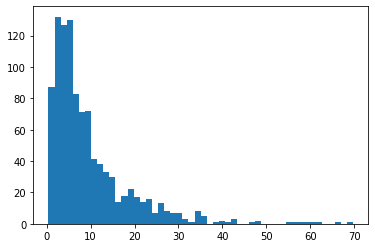

In [149]:
# plt.hist(raw_er_missing_alive.age, bins=50)
# plt.title("Missing Data Age")

plt.hist(nooutlier_missing.LOSdays, bins=50)

(array([7.540e+02, 2.092e+03, 2.396e+03, 2.483e+03, 1.711e+03, 1.513e+03,
        1.304e+03, 8.200e+02, 7.690e+02, 5.770e+02, 4.990e+02, 4.330e+02,
        3.320e+02, 3.230e+02, 2.500e+02, 1.800e+02, 2.040e+02, 1.460e+02,
        1.310e+02, 1.200e+02, 1.050e+02, 7.600e+01, 6.800e+01, 5.800e+01,
        5.600e+01, 4.100e+01, 3.600e+01, 3.800e+01, 2.500e+01, 4.100e+01,
        2.500e+01, 2.400e+01, 1.300e+01, 1.400e+01, 2.400e+01, 1.200e+01,
        1.200e+01, 1.000e+01, 1.300e+01, 7.000e+00, 1.300e+01, 1.200e+01,
        6.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        3.000e+00, 5.000e+00]),
 array([ 0.42  ,  1.8074,  3.1948,  4.5822,  5.9696,  7.357 ,  8.7444,
        10.1318, 11.5192, 12.9066, 14.294 , 15.6814, 17.0688, 18.4562,
        19.8436, 21.231 , 22.6184, 24.0058, 25.3932, 26.7806, 28.168 ,
        29.5554, 30.9428, 32.3302, 33.7176, 35.105 , 36.4924, 37.8798,
        39.2672, 40.6546, 42.042 , 43.4294, 44.8168, 46.2042, 47.5916,
        48.979 , 50.3

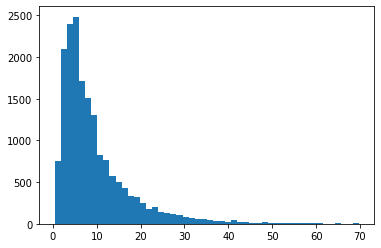

In [150]:
# plt.hist(simple_data.age, bins=50)
# plt.title("Age")

plt.hist(simple_data.LOSdays, bins=50)

Categorical (used chi-square test in excel):

In [ ]:
# a = pd.Categorical(nooutlier_raw_missing_alive.gender, categories=[0,1])
# b = pd.Categorical(nooutlier_simple_data.gender, categories=[0,1])
# from scipy.stats import chi2_contingency
# obs = np.array([[10, 10, 20], [20, 20, 20]])
# chi2_contingency(obs)

# pd.crosstab(nooutlier_raw_missing_alive['insurance'], nooutlier_simple_data['insurance'])

In [223]:
simple_data_dummified.dtypes

gender                               int64
age                                  int64
LOSdays                            float64
NumDiagnosisByDay                  float64
NumProcsByDay                      float64
NumCPTeventsByDay                  float64
NumInputByDay                      float64
NumLabsByDay                       float64
NumMicroLabsByDay                  float64
NumNotesByDay                      float64
NumOutputByDay                     float64
NumRxByDay                         float64
NumChartEventsByDay                float64
TotalNumInteractByDay              float64
insurance_INSURED                    uint8
insurance_UNINSURED                  uint8
religion_RELIGIOUS                   uint8
religion_UNKNOWN                     uint8
marital_status_MARRIED               uint8
marital_status_UNKNOWN               uint8
marital_status_UNMARRIED             uint8
ethnicity_ASIAN_PACIFICISLANDER      uint8
ethnicity_BLACK                      uint8
ethnicity_H

# Modeling:

In [224]:
y = simple_data_dummified.LOSdays
X = simple_data_dummified.loc[:, simple_data_dummified.columns != 'LOSdays']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [225]:
import numpy as np
from sklearn import metrics
import seaborn as sns

def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

# XGBoost:

In [226]:
import time
start_time = time.time()

from xgboost import XGBRegressor, plot_importance

xgbmodel = XGBRegressor()
xgbmodel.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.2815141677856445 seconds ---


In [227]:
# make predictions for test data
y_pred_xgb = xgbmodel.predict(X_test)
predictions_xgb = [round(value) for value in y_pred_xgb ]

mae_xgb = metrics.mean_absolute_error(y_test, predictions_xgb)
mse_xgb = metrics.mean_squared_error(y_test, predictions_xgb)
print("Mean Absolute Error XGBoost: ", mae_xgb)
print("Mean Squared Error XGBoost: ", mse_xgb)
print('Root Mean Squared Error XGBoost:', np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb)))
print("Explained Variance Score XGBoost:", metrics.explained_variance_score(predictions_xgb, y_test))

Mean Absolute Error XGBoost:  1.2596824058459808
Mean Squared Error XGBoost:  4.409099803260259
Root Mean Squared Error XGBoost: 2.099785656504077
Explained Variance Score XGBoost: 0.9368008313513144


In [221]:
max(simple_data_dummified.NumNotesByDay)

88.92592592592592

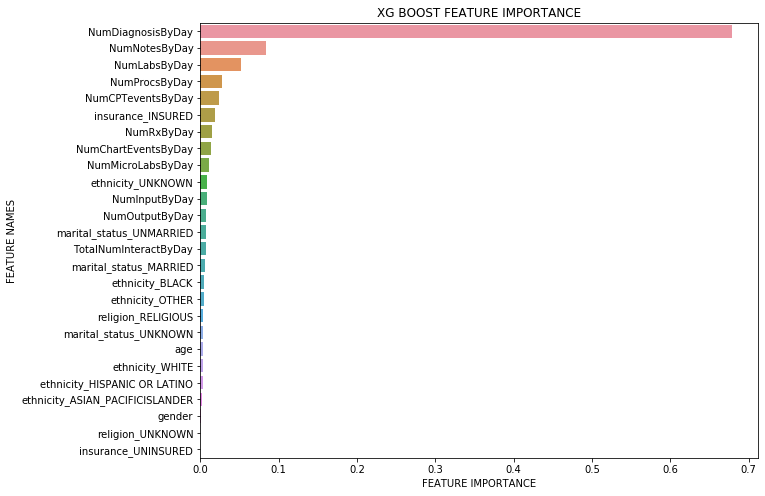

In [228]:
features_xgb = simple_data_dummified.loc[:, simple_data_dummified.columns != 'LOSdays'].columns

plot_feature_importance(xgbmodel.feature_importances_,features_xgb,'XG BOOST ')

In [229]:
predictions_xgb

[7.0,
 8.0,
 4.0,
 4.0,
 8.0,
 4.0,
 4.0,
 17.0,
 6.0,
 8.0,
 8.0,
 4.0,
 25.0,
 4.0,
 8.0,
 8.0,
 13.0,
 6.0,
 5.0,
 38.0,
 62.0,
 7.0,
 22.0,
 6.0,
 8.0,
 7.0,
 4.0,
 6.0,
 4.0,
 38.0,
 3.0,
 7.0,
 10.0,
 10.0,
 2.0,
 17.0,
 3.0,
 8.0,
 6.0,
 10.0,
 39.0,
 3.0,
 6.0,
 19.0,
 10.0,
 27.0,
 10.0,
 7.0,
 8.0,
 10.0,
 7.0,
 27.0,
 6.0,
 2.0,
 15.0,
 3.0,
 15.0,
 8.0,
 4.0,
 5.0,
 5.0,
 17.0,
 7.0,
 10.0,
 14.0,
 4.0,
 8.0,
 14.0,
 7.0,
 3.0,
 3.0,
 12.0,
 16.0,
 6.0,
 3.0,
 3.0,
 4.0,
 4.0,
 12.0,
 8.0,
 24.0,
 17.0,
 13.0,
 4.0,
 13.0,
 21.0,
 12.0,
 6.0,
 18.0,
 2.0,
 16.0,
 11.0,
 9.0,
 46.0,
 4.0,
 14.0,
 15.0,
 4.0,
 6.0,
 5.0,
 6.0,
 9.0,
 7.0,
 4.0,
 4.0,
 7.0,
 7.0,
 4.0,
 5.0,
 3.0,
 11.0,
 8.0,
 5.0,
 5.0,
 5.0,
 4.0,
 11.0,
 8.0,
 28.0,
 9.0,
 3.0,
 4.0,
 3.0,
 6.0,
 3.0,
 7.0,
 33.0,
 28.0,
 2.0,
 5.0,
 4.0,
 11.0,
 3.0,
 16.0,
 10.0,
 12.0,
 1.0,
 11.0,
 8.0,
 20.0,
 14.0,
 2.0,
 5.0,
 1.0,
 9.0,
 19.0,
 16.0,
 12.0,
 4.0,
 25.0,
 4.0,
 12.0,
 1.0,
 5.0,
 7.0,
 16.0,
 9.0,
 

In [230]:
# "Learn" the median from the training data
median_train = np.median(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * median_train
# Compute MAE
mae_baseline = metrics.mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 5.57


## Hyperparameter tuning

https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [231]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

params['eval_metric'] = "mae"

num_boost_round = 999

In [232]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [233]:
xgbmodel_tuned = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best MAE: {:.2f} with {} rounds".format(
                 xgbmodel_tuned.best_score,
                 xgbmodel_tuned.best_iteration+1))

[23:06:55] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:6.45095
[1]	Test-mae:4.51872
[2]	Test-mae:3.21318
[3]	Test-mae:2.37486
[4]	Test-mae:1.86827
[5]	Test-mae:1.57913
[6]	Test-mae:1.42726
[7]	Test-mae:1.34279
[8]	Test-mae:1.29949
[9]	Test-mae:1.27483
[10]	Test-mae:1.26107
[11]	Test-mae:1.25183
[12]	Test-mae:1.24859
[13]	Test-mae:1.24134
[14]	Test-mae:1.23852
[15]	Test-mae:1.23932
[16]	Test-mae:1.23587
[17]	Test-mae:1.23515
[18]	Test-mae:1.23538
[19]	Test-mae:1.23410
[20]	Test-mae:1.23373
[21]	Test-mae:1.23148
[22]	Test-mae:1.22970
[23]	Test-mae:1.23151
[24]	Test-mae:1.23172
[25]	Test-mae:1.22812
[26]	Test-mae:1.22753
[27]	Test-mae:1.22588
[28]	Test-mae:1.22571
[29]	Test-mae:1.22476
[30]	Test-mae:1.22483
[31]	Test-mae:1.22292
[32]	Test-mae:1.22430
[33]	Test-mae:1.22360
[34]	Test-mae:1.22348
[35]	Test-mae:1.22225
[36]	Test-mae:1.22475
[37]	Test-mae:1.22556
[38]	Test-mae:1.22662
[39

In [234]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[23:06:56] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:56] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:56] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:56] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:56] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,6.346214,0.034727,6.340220,0.146609
1,4.459052,0.024914,4.464006,0.110257
2,3.154328,0.018296,3.170774,0.084777
3,2.288008,0.014536,2.333439,0.063921
4,1.752826,0.012413,1.834495,0.052558
5,1.434811,0.011454,1.553012,0.051337
6,1.253621,0.008667,1.401426,0.047942
7,1.151001,0.007782,1.325911,0.048060
8,1.090303,0.006617,1.282442,0.046659
9,1.051155,0.005701,1.262041,0.046579


In [235]:
cv_results['test-mae-mean'].min()

1.2181234

In [236]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [237]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))


CV with max_depth=9, min_child_weight=5
[23:07:07] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:07] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:07] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:07] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:07] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 1.2006320000000001 for 22 rounds
CV with max_depth=9, min_child_weight=6
[23:07:10] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:10] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:10] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:10] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:10] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 1.217154 for 13 rounds
CV with max_depth=9, min_child_weight=7
[23:07:12] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now d

In [238]:
params['max_depth'] = 9
params['min_child_weight'] = 5

In [239]:
# Tune subsample: corresponds to the fraction of observations (the rows) to subsample at each step. 
# By default it is set to 1 meaning that we use all rows.

# Tune colsample_bytree: corresponds to the fraction of features (the columns) to use. 
# By default it is set to 1 meaning that we will use all features. 

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[23:08:04] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:04] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:04] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:04] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:04] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 1.2006320000000001 for 22 rounds
CV with subsample=1.0, colsample=0.9
[23:08:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:06] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:07] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 1.21156 for 14 rounds
CV with subsample=1.0, colsample=0.8
[23:08:09] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecat

	MAE 1.2210687999999998 for 18 rounds
CV with subsample=0.7, colsample=1.0
[23:08:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 1.2294278 for 13 rounds
CV with subsample=0.7, colsample=0.9
[23:08:33] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprec

In [240]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

In [241]:
# Tune eta - learning rate

%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round, seed=42, nfold=5, metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))


CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 485 µs
CV with eta=0.3
[23:09:05] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:05] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:05] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:05] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:05] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 17.1 s, sys: 263 ms, total: 17.4 s
Wall time: 2.38 s
	MAE 1.2006320000000001 for 22 rounds

CV with eta=0.2
[23:09:07] WARNING: /Users/travis/build/dmlc/xgboost

/Users/dereklee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  from ipykernel import kernelapp as app


CPU times: user 35.5 s, sys: 1.22 s, total: 36.7 s
Wall time: 5.59 s
	MAE 1.1736537999999999 for 48 rounds

CV with eta=0.1
[23:09:13] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:13] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:13] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:13] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:13] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1min 10s, sys: 1.15 s, total: 1min 11s
Wall time: 9.69 s
	MAE 1.1447942000000002 for 92 rounds

CV with eta=0.05
[2

In [242]:
params['eta'] = 0.01

In [243]:
params

{'max_depth': 9,
 'min_child_weight': 5,
 'eta': 0.01,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [244]:
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)


[23:13:50] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:9.12460
[1]	Test-mae:9.03382
[2]	Test-mae:8.94400
[3]	Test-mae:8.85503
[4]	Test-mae:8.76694
[5]	Test-mae:8.67966
[6]	Test-mae:8.59353
[7]	Test-mae:8.50835
[8]	Test-mae:8.42404
[9]	Test-mae:8.34029
[10]	Test-mae:8.25781
[11]	Test-mae:8.17594
[12]	Test-mae:8.09526
[13]	Test-mae:8.01507
[14]	Test-mae:7.93581
[15]	Test-mae:7.85656
[16]	Test-mae:7.77915
[17]	Test-mae:7.70249
[18]	Test-mae:7.62595
[19]	Test-mae:7.55048
[20]	Test-mae:7.47544
[21]	Test-mae:7.40108
[22]	Test-mae:7.32813
[23]	Test-mae:7.25514
[24]	Test-mae:7.18292
[25]	Test-mae:7.11171
[26]	Test-mae:7.04104
[27]	Test-mae:6.97107
[28]	Test-mae:6.90202
[29]	Test-mae:6.83336
[30]	Test-mae:6.76563
[31]	Test-mae:6.69874
[32]	Test-mae:6.63186
[33]	Test-mae:6.56590
[34]	Test-mae:6.50091
[35]	Test-mae:6.43642
[36]	Test-mae:6.37296
[37]	Test-mae:6.30965
[38]	Test-mae:6.24759
[39

[355]	Test-mae:1.16051
[356]	Test-mae:1.16016
[357]	Test-mae:1.15981
[358]	Test-mae:1.15940
[359]	Test-mae:1.15899
[360]	Test-mae:1.15868
[361]	Test-mae:1.15823
[362]	Test-mae:1.15784
[363]	Test-mae:1.15753
[364]	Test-mae:1.15721
[365]	Test-mae:1.15695
[366]	Test-mae:1.15643
[367]	Test-mae:1.15603
[368]	Test-mae:1.15563
[369]	Test-mae:1.15528
[370]	Test-mae:1.15492
[371]	Test-mae:1.15459
[372]	Test-mae:1.15427
[373]	Test-mae:1.15388
[374]	Test-mae:1.15352
[375]	Test-mae:1.15319
[376]	Test-mae:1.15288
[377]	Test-mae:1.15257
[378]	Test-mae:1.15231
[379]	Test-mae:1.15202
[380]	Test-mae:1.15170
[381]	Test-mae:1.15143
[382]	Test-mae:1.15114
[383]	Test-mae:1.15081
[384]	Test-mae:1.15052
[385]	Test-mae:1.15019
[386]	Test-mae:1.14986
[387]	Test-mae:1.14974
[388]	Test-mae:1.14961
[389]	Test-mae:1.14933
[390]	Test-mae:1.14907
[391]	Test-mae:1.14883
[392]	Test-mae:1.14865
[393]	Test-mae:1.14837
[394]	Test-mae:1.14813
[395]	Test-mae:1.14787
[396]	Test-mae:1.14776
[397]	Test-mae:1.14759
[398]	Test-

[712]	Test-mae:1.12784
[713]	Test-mae:1.12779
[714]	Test-mae:1.12773
[715]	Test-mae:1.12778
[716]	Test-mae:1.12782
[717]	Test-mae:1.12777
[718]	Test-mae:1.12778
[719]	Test-mae:1.12769
[720]	Test-mae:1.12767
[721]	Test-mae:1.12768
[722]	Test-mae:1.12771
[723]	Test-mae:1.12768
[724]	Test-mae:1.12762
[725]	Test-mae:1.12755
[726]	Test-mae:1.12756
[727]	Test-mae:1.12754
[728]	Test-mae:1.12749
[729]	Test-mae:1.12752
[730]	Test-mae:1.12747
[731]	Test-mae:1.12751
[732]	Test-mae:1.12748
[733]	Test-mae:1.12743
[734]	Test-mae:1.12744
[735]	Test-mae:1.12743
[736]	Test-mae:1.12745
[737]	Test-mae:1.12738
[738]	Test-mae:1.12737
[739]	Test-mae:1.12733
[740]	Test-mae:1.12734
[741]	Test-mae:1.12727
[742]	Test-mae:1.12731
[743]	Test-mae:1.12730
[744]	Test-mae:1.12722
[745]	Test-mae:1.12712
[746]	Test-mae:1.12712
[747]	Test-mae:1.12708
[748]	Test-mae:1.12704
[749]	Test-mae:1.12698
[750]	Test-mae:1.12695
[751]	Test-mae:1.12693
[752]	Test-mae:1.12685
[753]	Test-mae:1.12680
[754]	Test-mae:1.12673
[755]	Test-

In [245]:
metrics.mean_absolute_error(best_model.predict(dtest), y_test)



1.1243123665942847

In [246]:
print("Explained Variance Score XGBoost:", metrics.explained_variance_score(best_model.predict(dtest), y_test))

Explained Variance Score XGBoost: 0.9448749658031844


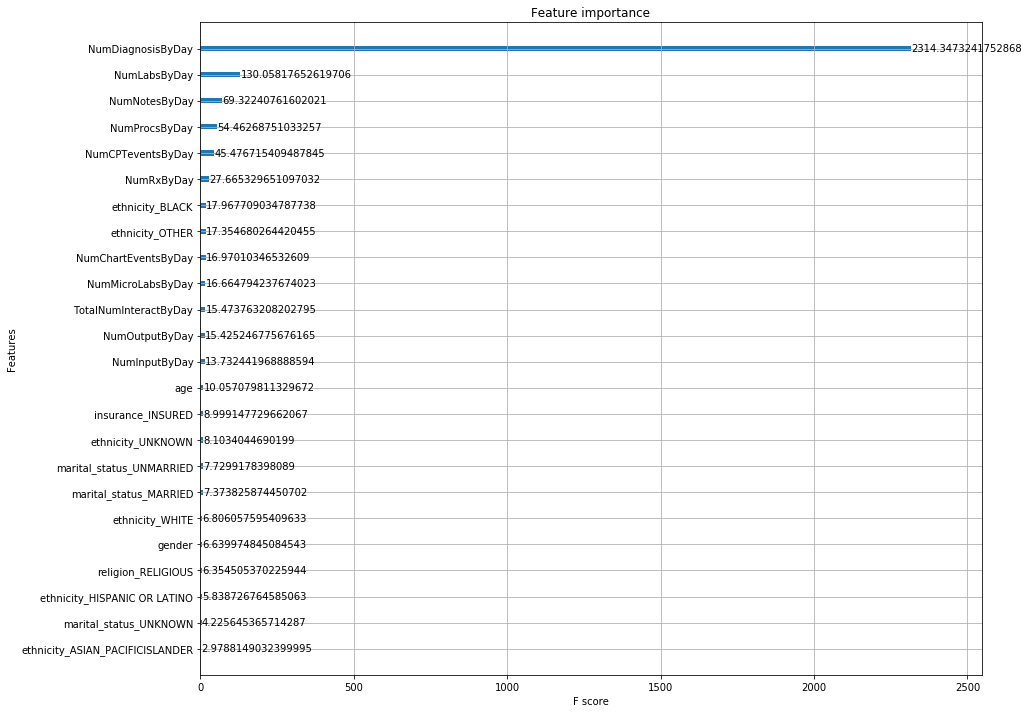

In [247]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(14, 12))
plot_importance(best_model, ax=ax, importance_type='gain')

In [248]:
best_model.save_model("xgb_best.model")

In [ ]:
loaded_model = xgb.Booster()
loaded_model.load_model("xgb_best.model")
# And use it for predictions.
loaded_model.predict(dtest)

In [ ]:
# !pip install graphviz
from xgboost import plot_tree
plot_tree(best_model)
fig = plt.gcf()
fig.set_size_inches(300, 200)
# plt.figure(figsize=(10,8))
# plt.show()